In [55]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import (
    Ridge,RidgeCV,
    Lasso,LassoCV,
    ElasticNet, ElasticNetCV,
    LinearRegression
)
from sklearn.model_selection import(
    cross_val_score,
    train_test_split
)
from sklearn.preprocessing import (
    StandardScaler,
    PolynomialFeatures
)
from sklearn.feature_selection import SelectFromModel
pd.set_option('display.max_rows', 1000)  # or 1000
pd.set_option('display.max_columns', 1000)  # or 1000

from itertools import combinations
from itertools import permutations

from sklearn.preprocessing import OneHotEncoder

In [56]:
df = pd.read_csv('datasets/train.csv')
kaggle_test = pd.read_csv('datasets/test.csv')

In [57]:
df


Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL           NaN     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
0      NaN       IR1          Lvl    AllPub    CulDSac        Gtl   
1      NaN       IR1          Lvl    AllPub    CulDSac        Gtl   
2      NaN       Reg          Lvl    AllPub     Inside        Gtl   
3      NaN       Reg          Lvl    AllPub     Inside        Gtl   
4      NaN       IR1          Lvl    AllPub     Inside        Gtl   
...    ...       ...          ...       ...        ...        ...   
2046   NaN       IR1          HLS    AllPub     Inside        Gtl   
2047   NaN       IR1          Lvl    AllPub     Inside        Gtl   
2048   NaN       Reg          Bnk    AllPub     Inside        Gtl   
2049   NaN       Reg          Lvl    AllPub     Corner        Gtl   
2050   NaN       Reg          Lvl    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
0          Sawyer        RRAe        Norm      1Fam      2Story             6   
1         SawyerW        Norm        Norm      1Fam      2Story             7   
2           NAmes        Norm        Norm      1Fam      1Story             5   
3          Timber        Norm        Norm      1Fam      2Story             5   
4         SawyerW        Norm        Norm      1Fam      1.5Fin             6   
...           ...         ...         ...       ...         ...           ...   
2046       Timber        Norm        Norm      1Fam      1Story             8   
2047      Edwards        Norm        Norm      1Fam      1Story             4   
2048      Crawfor        Norm        Norm      1Fam      1.5Fin             6   
2049        NAmes        Norm        Norm      1Fam      1Story             4   
2050      Gilbert        Norm        Norm      1Fam      2Story             7   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
0                8        1976            2005      Gable   CompShg   
1                5        1996            1997      Gable   CompShg   
2                7        1953            2007      Gable   CompShg   
3                5        2006            2007      Gable   CompShg   
4                8        1900            1993      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2046             5        2007            2007      Gable   CompShg   
2047             5        1940            1950      Gable   CompShg   
2048             6        1928            1950      Gable   CompShg   
2049             5        1956            1956      Gable   CompShg   
2050             5        1999            1999      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
0         HdBoard      Plywood      BrkFace         289.0         Gd   
1         VinylSd      VinylSd      BrkFace         132.0         Gd   
2         VinylSd      VinylSd         None           0.0         TA   
3         VinylSd      VinylSd         None           0.0         TA   
4         Wd Sdng      Plywood         None 

In [58]:
kaggle_test

Id         PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    2658   902301120          190        RM          69.0      9142   Pave   
1    2718   905108090           90        RL           NaN      9662   Pave   
2    2414   528218130           60        RL          58.0     17104   Pave   
3    1989   902207150           30        RM          60.0      8520   Pave   
4     625   535105100           20        RL           NaN      9500   Pave   
5     333   923228370          160        RM          21.0      1890   Pave   
6    1327   902427150           20        RM          52.0      8516   Pave   
7     858   907202130           20        RL           NaN      9286   Pave   
8      95   533208090          160        FV          39.0      3515   Pave   
9    1568   914476010           20        RL          75.0     10125   Pave   
10   2482   531452100          120        RL          50.0      7175   Pave   
11   1364   903455140           30        RM          60.0      7200   Pave   
12   2584   535303050           20        RL          75.0     11310   Pave   
13    818   906230030           90        RL           NaN      7976   Pave   
14   2673   903206160           70        RL          69.0     11737   Pave   
15   2089   905480180           20        RL          60.0      9060   Pave   
16   1297   902128150          190        RM          60.0     10800   Pave   
17    790   905451300           20        RL          68.0      9571   Pave   
18   2616   535425040           20        RL          80.0     10800   Pave   
19    720   902330040           70        RM         121.0     17671   Pave   
20    222   905105070           20        RL           NaN      8246   Pave   
21    557   532354160           20        RL           NaN      8499   Pave   
22   1148   531451020          120        RL          50.0      8012   Pave   
23   2766   906475050           80        RL           NaN     21453   Pave   
24    534   531363010           20        RL          80.0      9605   Pave   
25   1452   907227050           20        RL          60.0      7180   Pave   
26    630   535150070           50        RL           NaN     12513   Pave   
27   2648   902125020           70        RM          50.0      9000   Pave   
28    125   534425310           85        RL          80.0      8800   Pave   
29   1904   534451020           50        RL          51.0      3500   Pave   
30   1670   527404150           20        RL           NaN      7340   Pave   
31    756   903458170           30        RM          52.0      6240   Pave   
32    717   902326030           70        RM          65.0     11700   Pave   
33   1032   527378020           20        RL          80.0     10000   Pave   
34    852   907196060           20        RL          75.0     11166   Pave   
35   1731   528218100           60        RL          58.0     13204   Pave   
36   2639   902103090           50        RM          60.0      5520   Pave   
37   2071   905228020           20        RL           NaN      9000   Pave   
38   1267   535451010           20        RL          74.0      8892   Pave   
39   1851   533242080           20        FV          73.0      7321   Pave   
40    567   533210010          160        FV          40.0      3951   Pave   
41   2439   528280100           60        RL           NaN     11214   Pave   
42   1898   534427140           20        RL          75.0      7388   Pave   
43    647   535351050           20        RL          75.0     14559   Pave   
44   2256   916226090          120        RL          46.0      4054   Pave   
45    979   923228150          160        RM          21.0      1533   Pave   
46   1444   907196050           60        RL          68.0     11250   Pave   
47   2485   531479030           20        RH          60.0      7800   Pave   
48    157   535350040           20        RL          74.0      5868   Pave   
49     88   532377100           20        RL          75.

In [59]:
# rename column names 

new_columns = {
    'Id': 'id',
    'PID':'pid',
    'MS SubClass': 'ms_subclass',
    'MS Zoning': 'ms_zoning',
    'Lot Frontage': 'lot_front',
    'Lot Area': 'lot_area',
    'Street': 'street',
    'Alley':'alley',
    'Lot Shape': 'lot_shape',
    'Land Contour':'land_contour',
    'Utilities': 'util',
    'Lot Config': 'lot_config',
    'Land Slope': 'land_slope',
    'Neighborhood': 'neighborhood',
    'Condition 1': 'cond_1',    
    'Condition 2': 'cond_2',
    'Bldg Type': 'bldg_type',
    'House Style': 'house_style',
    'Overall Qual': 'overall_qual',
    'Overall Cond': 'overall_cond',
    'Year Built': 'year_built',
    'Year Remod/Add': 'year_remod_add',
    'Roof Style': 'roof_style',
    'Roof Matl': 'roof_matl',
    'Exterior 1st': 'ext_1st',
    'Exterior 2nd': 'ext_2nd',
    'Mas Vnr Type': 'mas_vnr_type',
    'Mas Vnr Area': 'mas_vnr_area',
    'Exter Qual': 'exter_qual',
    'Exter Cond': 'exter_cond',
    'Foundation': 'foundation',
    'Bsmt Qual': 'bsmt_qual',
    'Bsmt Cond': 'bsmt_cond',
    'Bsmt Exposure': 'bsmt_exposure',
    'BsmtFin Type 1': 'bsmtfin_type1',
    'BsmtFin SF 1': 'bsmtfin_sf1',
    'BsmtFin Type 2': 'bsmt_type2',
    'BsmtFin SF 2': 'bsmt_sf2',
    'Bsmt Unf SF': 'bsmt_unf_sf',
    'Total Bsmt SF': 'total_bsmt_sf',
    'Heating': 'heating',
    'Heating QC': 'heating_qc',
    'Central Air': 'central_air',
    'Electrical': 'electrical',
    '1st Flr SF': '1st_flr_sf',
    '2nd Flr SF': '2nd_flr_sf',
    'Low Qual Fin SF': 'low_qual_fin_sf',
    'Gr Liv Area': 'gr_liv_area',
    'Bsmt Full Bath': 'bsmt_full_bath',    
    'Bsmt Half Bath': 'bsmt_half_bath',
    'Full Bath': 'full_bath',
    'Half Bath': 'half_bath',
    'Bedroom AbvGr': 'bedroom_abv_gr',
    'Kitchen AbvGr': 'kitchen_abv_gr',
    'Kitchen Qual': 'kitchen_qual',
    'TotRms AbvGrd': 'tot_rms_abv_grd',
    'Functional': 'functional',
    'Fireplaces': 'fireplace',
    'Fireplace Qu': 'fireplace_qu',
    'Garage Type': 'garage_type',
    'Garage Yr Blt': 'garage_yr_blt',
    'Garage Finish': 'garage_finish',
    'Garage Cars': 'garag_cars',
    'Garage Area': 'garage_area',
    'Garage Qual': 'garage_qual',
    'Garage Cond': 'garage_cond',
    'Paved Drive': 'paved_drive',
    'Wood Deck SF': 'wood_deck_sf',
    'Open Porch SF': 'open_porch_sf',
    'Enclosed Porch': 'enclosed_porch',
    '3Ssn Porch': '3ssn_porch',
    'Screen Porch': 'screen_porch',
    'Pool Area': 'pool_area',
    'Pool QC': 'pool_qc',
    'Fence': 'fence',
    'Misc Feature': 'misc_feature',
    'Misc Val': 'misc_val',
    'Mo Sold': 'mo_sold',
    'Yr Sold': 'yr_sold',
    'Sale Type': 'sale_type',
    'SalePrice':'sale_price',
}

df.rename(columns=new_columns, inplace=True)
kaggle_test.rename(columns=new_columns, inplace=True)

In [60]:
df = pd.concat([df,kaggle_test], axis = 0)

## EDA
- **Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

## Data Cleaning
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

**Clean missing values**  

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 877
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2929 non-null   int64  
 1   pid              2929 non-null   int64  
 2   ms_subclass      2929 non-null   int64  
 3   ms_zoning        2929 non-null   object 
 4   lot_front        2439 non-null   float64
 5   lot_area         2929 non-null   int64  
 6   street           2929 non-null   object 
 7   alley            198 non-null    object 
 8   lot_shape        2929 non-null   object 
 9   land_contour     2929 non-null   object 
 10  util             2929 non-null   object 
 11  lot_config       2929 non-null   object 
 12  land_slope       2929 non-null   object 
 13  neighborhood     2929 non-null   object 
 14  cond_1           2929 non-null   object 
 15  cond_2           2929 non-null   object 
 16  bldg_type        2929 non-null   object 
 17  house_style    

In [63]:
df.shape

(2929, 81)

In [64]:
df.isnull().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_front           490
lot_area              0
street                0
alley              2731
lot_shape             0
land_contour          0
util                  0
lot_config            0
land_slope            0
neighborhood          0
cond_1                0
cond_2                0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod_add        0
roof_style            0
roof_matl             0
ext_1st               0
ext_2nd               0
mas_vnr_type         23
mas_vnr_area         23
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            80
bsmt_cond            80
bsmt_exposure        83
bsmtfin_type1        80
bsmtfin_sf1           1
bsmt_type2           81
bsmt_sf2              1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

In [65]:
# build list of features with na 

feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()]
for feat in feature_nan:
    print(feat, f'has {round((df[feat].isnull().mean())*100,2)}% missing values')

lot_front has 16.73% missing values
alley has 93.24% missing values
mas_vnr_type has 0.79% missing values
mas_vnr_area has 0.79% missing values
bsmt_qual has 2.73% missing values
bsmt_cond has 2.73% missing values
bsmt_exposure has 2.83% missing values
bsmtfin_type1 has 2.73% missing values
bsmtfin_sf1 has 0.03% missing values
bsmt_type2 has 2.77% missing values
bsmt_sf2 has 0.03% missing values
bsmt_unf_sf has 0.03% missing values
total_bsmt_sf has 0.03% missing values
electrical has 0.03% missing values
bsmt_full_bath has 0.07% missing values
bsmt_half_bath has 0.07% missing values
fireplace_qu has 48.55% missing values
garage_type has 5.36% missing values
garage_yr_blt has 5.43% missing values
garage_finish has 5.43% missing values
garag_cars has 0.03% missing values
garage_area has 0.03% missing values
garage_qual has 5.43% missing values
garage_cond has 5.43% missing values
pool_qc has 99.56% missing values
fence has 80.47% missing values
misc_feature has 96.38% missing values
sal

**Some missing values are bigger percentage than the other** 

- we need to find the correlation between the missing values and the sales price to judge if its good to remove or to keep

**Approach**

1) Larger values - might remove

2) Smaller values - need to conduct EDA and decide later

In [71]:
df = df.reset_index()

69.19967199671997
68.0


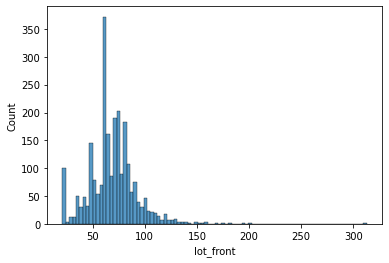

In [73]:
# Lot_font has normal distrubtion centered across mean of 69

sns.histplot(x = 'lot_front', data =df)
print(df['lot_front'].mean())
print(df['lot_front'].median())

In [74]:
# get mean and fill into NA
# why mean -->> because normally distributed centered at mean 69. 
df['lot_front'].fillna(df['lot_front'].mean(),inplace = True)

69.19967199671997


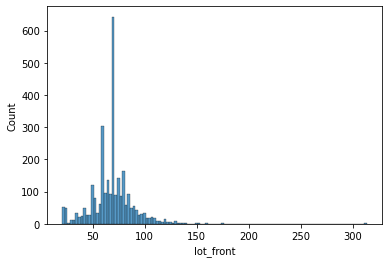

In [75]:
# Lot_font has normal distrubtion centered across mean of 69

sns.histplot(x = 'lot_front', data =df)
print(df['lot_front'].mean())

In [76]:
# change 'nan' to NoAlleyAccess
df['alley'] = df['alley'].map(lambda x: 'NoAlley' if pd.isnull(x) else x)

<AxesSubplot:xlabel='alley', ylabel='sale_price'>

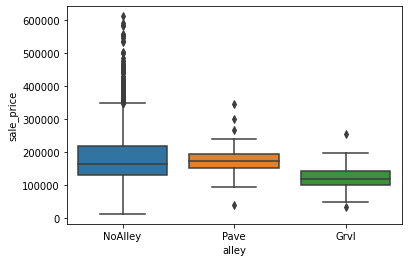

In [77]:
# no meaning to the sales 
# drop alley

sns.boxplot(
    data = df,
    x = 'alley',
    y = 'sale_price'
)

Boxplot shows strong outliers in NoAlley, hence if need to use this data, has to clear outliers first. 

In [78]:
# mas_vnr_type -->> categorical, insert most common type 
df.groupby(by='mas_vnr_type').count()['id']

mas_vnr_type
BrkCmn       25
BrkFace     880
CBlock        1
None       1752
Stone       248
Name: id, dtype: int64

mas_vnr_type already has a None column. Will need to classify nan into the mode of the types for minimal impact


In [79]:
# fill missing values with mode of mas_vnr_type
df['mas_vnr_type'].fillna(df['mas_vnr_type'].mode()[0], inplace = True)

(0.0, 600.0)

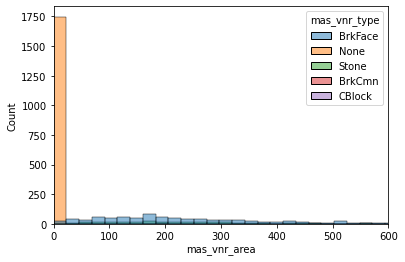

In [80]:
# checked categories for mas_vnr_area
# found if mas vnr area == 0, then belongs to none
sns.histplot(x = 'mas_vnr_area', hue = 'mas_vnr_type', data =df)
plt.xlim(0,600)

<AxesSubplot:xlabel='mas_vnr_type', ylabel='sale_price'>

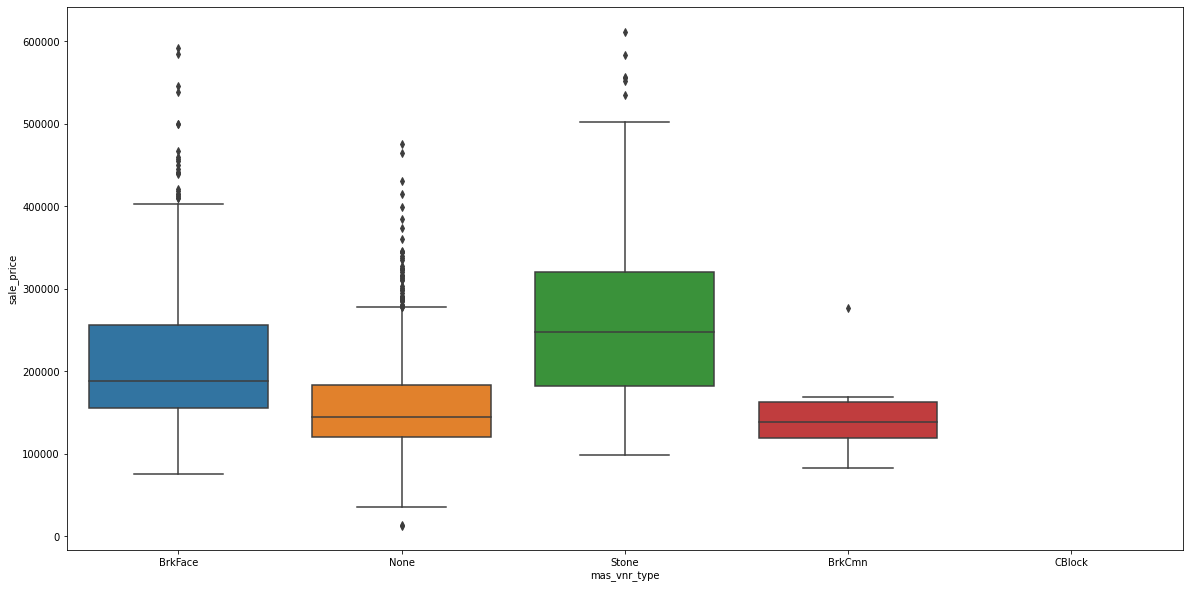

In [81]:
# checking nominal category: mas_vnr_type against sale price

plt.figure(figsize=(20,10))
sns.boxplot(
    x = 'mas_vnr_type',
    y = 'sale_price',
    data = df
)

In [82]:
# create dictionary that stores mean of
mas_dict_mean = {key:val for key, val in df.groupby(['mas_vnr_type'])['mas_vnr_area'].mean().iteritems()}

mas_dict_mean

{'BrkCmn': 195.48,
 'BrkFace': 261.6465909090909,
 'CBlock': 198.0,
 'None': 0.7031963470319634,
 'Stone': 237.44354838709677}

In [83]:
# create function that returns mean based on mas_dict_mean if column has null values 
def enter_area(col):
    area = col[0]
    mas_type = col[1]
    if pd.isnull(area):
        return mas_dict_mean[mas_type]
    else:
        return area

In [84]:
# fill in null values for -->> mas_vnr_area
df['mas_vnr_area'] = df[['mas_vnr_area', 'mas_vnr_type']].apply(enter_area, axis = 1)

In [85]:
# missing values seems common across about bsmt columns 
df[df['bsmt_exposure'].isnull()]

index    id        pid  ms_subclass ms_zoning   lot_front  lot_area  \
12       12   807  906226060           70        RL  120.000000     26400   
93       93   811  906226100           90        RL   64.000000      7018   
114     114   781  905228050           20        RL   69.199672      9000   
146     146   888  908128060           85        RL   64.000000      7301   
183     183  1554  910251050           20   A (agr)   80.000000     14584   
240     240  2740  905451050           20        RL   80.000000     12048   
249     249  2242  910206010           50        RM   64.000000     11067   
256     256  2745  905477010           20        RL   77.000000      8335   
390     390    84  532351140           90        RM   68.000000      8930   
437     437  1501  908201100           90        RL   65.000000      6040   
485     485   155  535327140           20        RL   60.000000      7200   
499     499   812  906226110           90        RL   64.000000      7018   
514     514  2082  905475520           30        RL   69.199672     11515   
580     580  1504  908204160           90        RL   74.000000      6845   
581     581   946  912251110           30   I (all)  109.000000     21780   
616     616  1498  908154080           20        RL  123.000000     47007   
635     635  2904  923125030           20   A (agr)  125.000000     31250   
642     642   953  914476020           90        RL   75.000000     10125   
696     696   274  908102060           30        RL   67.000000      8777   
700     700   207  903454060          190        RM   70.000000      5600   
737     737   788  905402070           20        RL   69.199672     15635   
772     772   679  535451170           90        RL   60.000000      7200   
790     790  1205  534276190           20        RL   74.000000      7785   
794     794  1255  535375140           20        RL   60.000000     10122   
924     924   677  535450160           90        RL   60.000000      8544   
933     933  1375  904101170           50        RL   80.000000     17120   
954     954  2622  535451190           20        RL   60.000000      7200   
1007   1007  1880  534252070           90        RL   69.199672     10899   
1022   1022  2703  904301410           30        RL   55.000000      8250   
1049   1049  2177  908152180           90        RL   69.199672      9555   
1089   1089   709  902205010           30        RM   50.000000      5925   
1098   1098  1260  535383100          190        RL   60.000000     10800   
1125   1125  2626  535454050           90        RL   69.199672      8544   
1157   1157   897  908225370           50        RL   50.000000      8405   
1211   1211  2893  916252170          120        RM   69.199672      8239   
1222   1222  1326  902427045           20        RM   70.000000     12702   
1252   1252   244  905478190           20        RL   60.000000     11100   
1256   1256   813  906226120           90        RL   64.000000      7018   
1270   1270  1569  914476080           90        RL   76.000000     10260   
1327   1327  1342  903230120           20        RM   99.000000      5940   
1331   1331   650  535353060           20        RL   75.000000      9533   
1377   1377  2707  905101330           90        RL   72.000000     10791   
1387   1387   787  905402060           20        RL   69.199672     13680   
1428   1428  1902  534450090           20        RL   50.000000      5000   
1456   1456  1797  528458090           60        FV   81.000000     10411   
1481   1481  2701  904100170           20        RL  100.000000     21370   
1547   1547    67  528445060           20        RL   73.000000      8987   
1594   1594  1502  908201110           90        RL   65.000000      6012   
1620   1620   815  906226140           90        RL   64.000000      7007   
1681   1681  1899  534429030           90        RL   70.000000      9842   
1684   1684  2004  902427140           20        RM   52.000000      8626   
16

<Figure size 1080x1080 with 0 Axes>

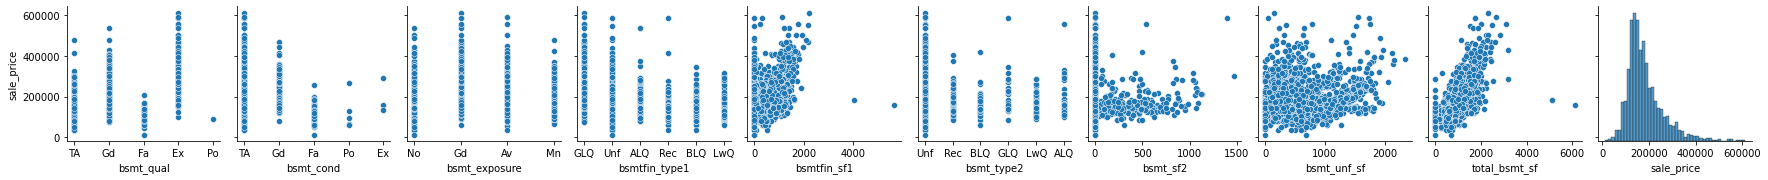

In [86]:
# create pairplot to check relationship between all bsmt parameters against sale_price
# noticed only total_basement_sf area has high correlation with sale_price
# checked only 58 out of 2051 data has NAN -->> meaning no basement 
# will want to change all null to 'NoBsmt'



plt.figure(figsize=(15,15))
sub_bsmt = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type1', 'bsmtfin_sf1', 'bsmt_type2', 'bsmt_sf2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'sale_price']

sns.pairplot(
    df,
    x_vars = sub_bsmt,
    y_vars = ['sale_price'],
    
)

In [87]:
# Create none category for those without basement
df['bsmt_cond'].fillna('NoBsmt',inplace = True)

<AxesSubplot:xlabel='bsmt_cond', ylabel='sale_price'>

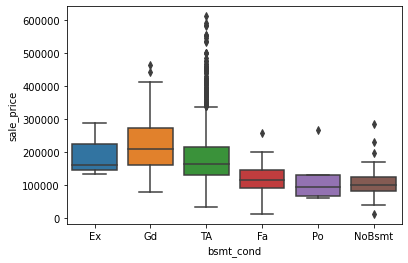

In [88]:
# cross check category, makes sense that those without basement will have lowest mean sale price 
sns.boxplot(
    x = 'bsmt_cond',
    y = 'sale_price',
    data = df,
    order = ['Ex','Gd', 'TA', 'Fa', 'Po', 'NoBsmt']
)

In [89]:
# Create none category for those without basement
df['bsmt_type2'].fillna('NoBsmt',inplace = True)

<AxesSubplot:xlabel='bsmt_type2', ylabel='sale_price'>

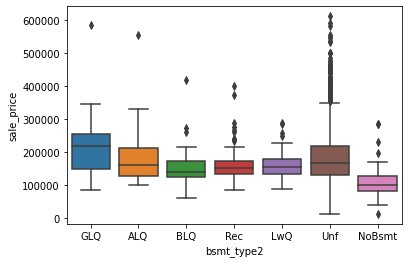

In [90]:
# notice higher prices are under unfinised. 
# no basement is the lowest mean score, which fits the ordinal flow. 

sns.boxplot(
    x = 'bsmt_type2',
    y = 'sale_price',
    data = df,
    order = ['GLQ', 'ALQ','BLQ','Rec','LwQ','Unf','NoBsmt']
)

In [91]:
# since it is numerical cat, need to take a look at mean. 
# found those with null, average sale price is lower than all the other cats 
# hence safe to create another cat for None. 

bsmt_mean_null = df.loc[df['bsmt_exposure'].isnull(), 'sale_price'].mean()
bsmt_mean = df.groupby('bsmt_exposure').mean()['sale_price']
print(f'mean of null values: {bsmt_mean_null}')
print('\n')
print(f'Mean values of basement exposure: {bsmt_mean}')
df['bsmt_exposure'].value_counts()

mean of null values: 111635.91379310345


Mean values of basement exposure: bsmt_exposure
Av    206262.451389
Gd    271610.566502
Mn    189377.570552
No    164533.532487
Name: sale_price, dtype: float64


No    1906
Av     418
Gd     283
Mn     239
Name: bsmt_exposure, dtype: int64

In [92]:
# Create none category for those without basement
df['bsmt_exposure'].fillna('NoBsmt',inplace = True)

<AxesSubplot:xlabel='bsmt_exposure', ylabel='sale_price'>

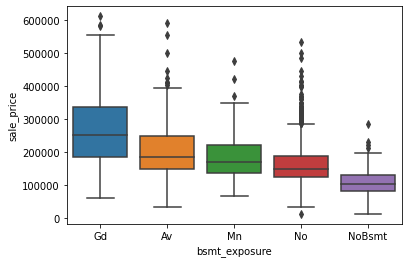

In [93]:
# cross checked ordinally correct for No basement cat
sns.boxplot(
    x = 'bsmt_exposure',
    y = 'sale_price',
    data = df,
    order = ['Gd','Av','Mn','No','NoBsmt']
)

In [94]:
# fill up null values with NoBsmt
df['bsmt_qual'].fillna('NoBsmt', inplace = True)

<AxesSubplot:xlabel='bsmt_qual', ylabel='sale_price'>

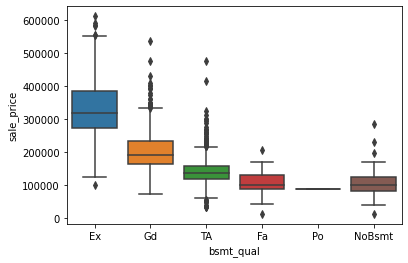

In [95]:
# cross checked ordinally correct for No basement cat
sns.boxplot(
    x = 'bsmt_qual',
    y = 'sale_price',
    data = df,
    order = ['Ex','Gd', 'TA', 'Fa', 'Po', 'NoBsmt']
)

**Seeing small points for Po** 
- might need to remove it if want to use this variable as it might skew predicted data inaccurately. 


In [96]:
# fill up null values with NoBsmt
df['bsmtfin_type1'].fillna('NoBsmt', inplace = True) 

<AxesSubplot:xlabel='bsmtfin_type1', ylabel='sale_price'>

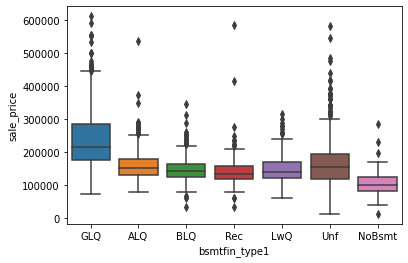

In [97]:
# cross checked ordinally correct for No basement cat

sns.boxplot(
    x = 'bsmtfin_type1',
    y = 'sale_price',
    data = df,
    order = ['GLQ', 'ALQ','BLQ','Rec','LwQ','Unf','NoBsmt']
)

In [98]:
# checked row has no basement
df[df['total_bsmt_sf'].isnull()]

index    id        pid  ms_subclass ms_zoning  lot_front  lot_area  \
1327   1327  1342  903230120           20        RM       99.0      5940   

     street    alley lot_shape land_contour    util lot_config land_slope  \
1327   Pave  NoAlley       IR1          Lvl  AllPub        FR3        Gtl   

     neighborhood cond_1 cond_2 bldg_type house_style  overall_qual  \
1327      BrkSide  Feedr   Norm      1Fam      1Story             4   

      overall_cond  year_built  year_remod_add roof_style roof_matl  ext_1st  \
1327             7        1946            1950      Gable   CompShg  MetalSd   

     ext_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
1327  CBlock         None           0.0         TA         TA      PConc   

     bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type1  bsmtfin_sf1 bsmt_type2  \
1327    NoBsmt    NoBsmt        NoBsmt        NoBsmt          NaN     NoBsmt   

      bsmt_sf2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
1327       NaN          NaN            NaN    GasA         TA           Y   

     electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
1327      FuseA         896           0                0          896   

      bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abv_gr  \
1327             NaN             NaN          1          0               2   

      kitchen_abv_gr kitchen_qual  tot_rms_abv_grd functional  fireplace  \
1327               1           TA                4        Typ          0   

     fireplace_qu garage_type  garage_yr_blt garage_finish  garag_cars  \
1327          NaN      Detchd         1946.0           Unf         1.0   

      garage_area garage_qual garage_cond paved_drive  wood_deck_sf  \
1327        280.0          TA          TA           Y             0   

      open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  \
1327              0               0           0             0          0   

     pool_qc  fence misc_feature  misc_val  mo_sold  yr_sold sale_type  \
1327     NaN  MnPrv          NaN         0        4     2008     ConLD   

      sale_price  
1327     79000.0

In [99]:
# replace na with 0 feet square

df['bsmtfin_sf1'].fillna(0, inplace = True) 
df['bsmt_sf2'].fillna(0, inplace = True) 
df['total_bsmt_sf'].fillna(0, inplace = True) 
df['bsmt_unf_sf'].fillna(0, inplace = True) 

<AxesSubplot:xlabel='fireplace_qu', ylabel='sale_price'>

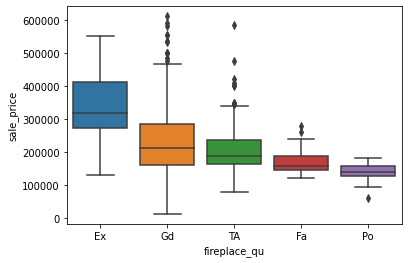

In [100]:
sns.boxplot(
    x = 'fireplace_qu',
    y = 'sale_price',
    data = df,
    order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
)

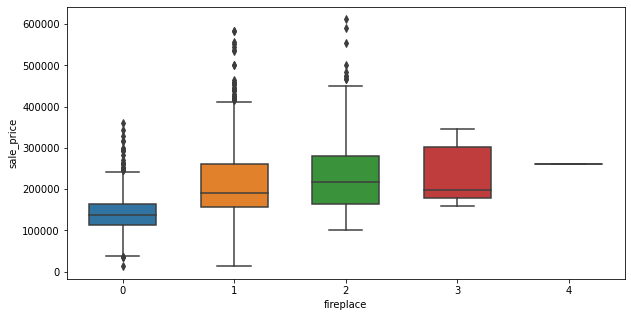

In [101]:
# Establish size of figure.
plt.figure(figsize = (10,5))


sns.boxplot(
    x = 'fireplace',
    y = 'sale_price',
    data = df,
#     hue = 'fireplace_qu',
#     hue_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    width = 0.6
);


In [102]:
df.groupby('fireplace')['fireplace'].count()

fireplace
0    1422
1    1273
2     221
3      12
4       1
Name: fireplace, dtype: int64

**Observed rating 4 having only one point, might need to remove this variable if need to use as results might be skewed**

In [103]:
# null values contain sale price mean close to 144000
df[df['fireplace_qu'].isnull()].agg(['mean', 'median'])['sale_price']

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


mean      142001.103
median    136500.000
Name: sale_price, dtype: float64

In [104]:
# found that cat Po suites best for null values to be included without affecting much mean 
df.groupby(['fireplace_qu']).agg(['mean', 'median', 'count'])['sale_price']

mean    median  count
fireplace_qu                                
Ex            331481.483871  320000.0     31
Fa            170287.203390  159500.0     59
Gd            233578.388145  213490.0    523
Po            139263.967742  139000.0     31
TA            204893.621622  188500.0    407

In [105]:
# fill na with NoFireplace
df['fireplace_qu'] = df['fireplace_qu'].fillna('NoFireplace')

<AxesSubplot:xlabel='fireplace_qu', ylabel='sale_price'>

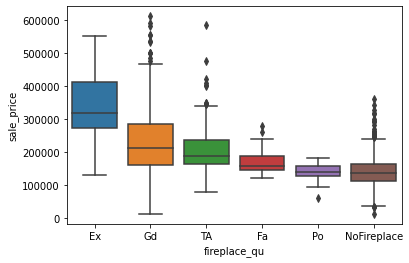

In [106]:
# cross checked ordinally correct for nofireplace
sns.boxplot(
    x = 'fireplace_qu',
    y = 'sale_price',
    data = df,
    order = ['Ex', 'Gd', 'TA', 'Fa', 'Po','NoFireplace'],
)

**Can see alot of outliers in Gd, TA, and Po (after adding NAN) inside. Hence, this might not be good to insert into our model**

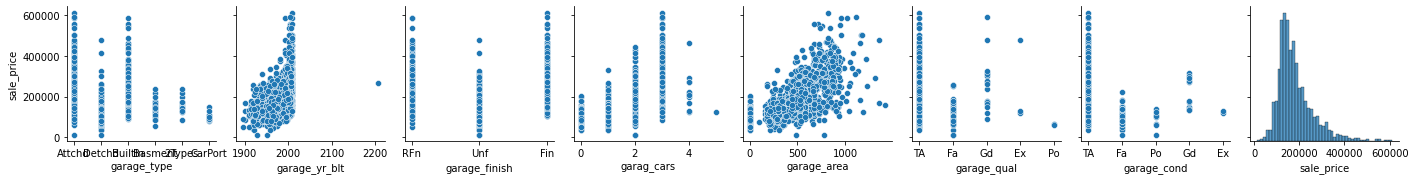

In [107]:
sns.pairplot(
    y_vars = 'sale_price',
    x_vars = ['garage_type',
    'garage_yr_blt', 'garage_finish', 'garag_cars', 'garage_area',
    'garage_qual', 'garage_cond','sale_price'],
    data = df
)

In [108]:
# fill in None for now, might drop categorical columns if need to refine model

df['garage_type'] = df['garage_type'].fillna('NoGarage')
df['garage_finish'] = df['garage_finish'].fillna('NoGarage')
df['garage_qual'] = df['garage_qual'].fillna('NoGarage')
df['garage_cond'] = df['garage_cond'].fillna('NoGarage')

df['garage_area'].fillna(df['garage_area'].mean(),inplace = True)
df['garag_cars'].fillna(df['garag_cars'].mode()[0],inplace = True)
# drop garage year built as null values cannot be replaced, it cannot be replaced by any random values or mean too. 

df.drop(columns = ['garage_yr_blt'], inplace = True)

In [109]:
# noticed when pool area ==0, other categories also null 

df[df['pool_area'] == 0]

index    id        pid  ms_subclass ms_zoning  lot_front  lot_area  \
0         0   109  533352170           60        RL  69.199672     13517   
1         1   544  531379050           60        RL  43.000000     11492   
2         2   153  535304180           20        RL  68.000000      7922   
3         3   318  916386060           60        RL  73.000000      9802   
4         4   255  906425045           50        RL  82.000000     14235   
...     ...   ...        ...          ...       ...        ...       ...   
2924    873  1662  527377110           60        RL  80.000000      8000   
2925    874  1234  535126140           60        RL  90.000000     14670   
2926    875  1373  904100040           20        RL  55.000000      8250   
2927    876  1672  527425140           20        RL  60.000000      9000   
2928    877  1939  535327160           20        RL  70.000000      8400   

     street    alley lot_shape land_contour    util lot_config land_slope  \
0      Pave  NoAlley       IR1          Lvl  AllPub    CulDSac        Gtl   
1      Pave  NoAlley       IR1          Lvl  AllPub    CulDSac        Gtl   
2      Pave  NoAlley       Reg          Lvl  AllPub     Inside        Gtl   
3      Pave  NoAlley       Reg          Lvl  AllPub     Inside        Gtl   
4      Pave  NoAlley       IR1          Lvl  AllPub     Inside        Gtl   
...     ...      ...       ...          ...     ...        ...        ...   
2924   Pave  NoAlley       Reg          Lvl  AllPub     Inside        Gtl   
2925   Pave  NoAlley       Reg          Lvl  AllPub     Inside        Gtl   
2926   Pave  NoAlley       Reg          Lvl  AllPub     Inside        Gtl   
2927   Pave  NoAlley       Reg          Lvl  AllPub        FR2        Gtl   
2928   Pave  NoAlley       Reg          Lvl  AllPub     Corner        Gtl   

     neighborhood cond_1 cond_2 bldg_type house_style  overall_qual  \
0          Sawyer   RRAe   Norm      1Fam      2Story             6   
1         SawyerW   Norm   Norm      1Fam      2Story             7   
2           NAmes   Norm   Norm      1Fam      1Story             5   
3          Timber   Norm   Norm      1Fam      2Story             5   
4         SawyerW   Norm   Norm      1Fam      1.5Fin             6   
...           ...    ...    ...       ...         ...           ...   
2924       NWAmes   PosN   Norm      1Fam      2Story             6   
2925        NAmes   Norm   Norm      1Fam      2Story             6   
2926       Sawyer  Feedr   Norm      1Fam      1Story             5   
2927        NAmes   Norm   Norm      1Fam      1Story             4   
2928        NAmes   Norm   Norm      1Fam      1Story             5   

      overall_cond  year_built  year_remod_add roof_style roof_matl  ext_1st  \
0                8        1976            2005      Gable   CompShg  HdBoard   
1                5        1996            1997      Gable   CompShg  VinylSd   
2                7        1953            2007      Gable   CompShg  VinylSd   
3                5        2006            2007      Gable   CompShg  VinylSd   
4                8        1900            1993      Gable   CompShg  Wd Sdng   
...            ...         ...             ...        ...       ...      ...   
2924             6        1974            1974      Gable   CompShg  HdBoard   
2925             7        1966            1999      Gable   CompShg  VinylSd   
2926             5        1968            1968        Hip   CompShg  HdBoard   
2927             6        1971            1971      Gable   CompShg  HdBoard   
2928             5        1955            1955      Gable   CompShg  MetalSd   

      ext_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
0     Plywood      BrkFace         289.0         Gd         TA     CBlock   
1     VinylSd      BrkFace         132.0         Gd         TA      PConc   
2     VinylSd         None           0.0         TA         Gd     CBlock   
3     VinylSd         None           0.0      

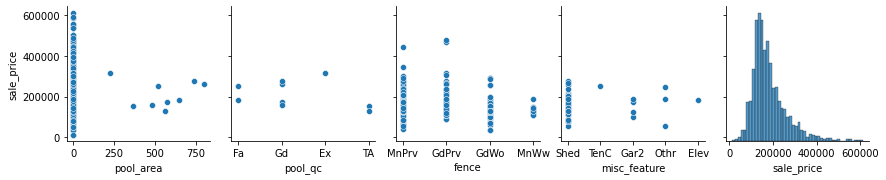

In [110]:
# too little points to do correlation for pool area 

sns.pairplot(
    x_vars = ['pool_area', 'pool_qc', 'fence', 'misc_feature', 'sale_price'],
    y_vars = 'sale_price',
    data = df
)

In [111]:
# drop all pool columns 

drop_pool_list = ['pool_qc', 'fence', 'misc_feature']

df = df.drop(columns = drop_pool_list, axis = 1)

<AxesSubplot:xlabel='year_built', ylabel='sale_price'>

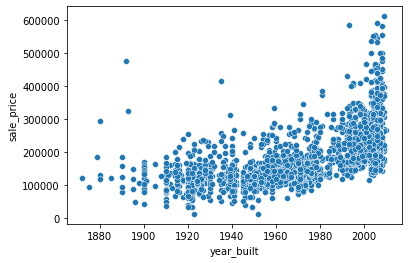

In [112]:
# seeing decreasing trend, and exceptionally high cost built recently 
sns.scatterplot(
    x = 'year_built',
    y = 'sale_price',
    data = df
)

<AxesSubplot:xlabel='sale_price', ylabel='Count'>

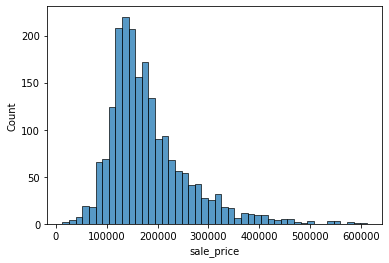

In [113]:
sns.histplot(x = 'sale_price', data = df)

In [114]:
# creating another set of classifiers for sale price for analysis

df['sale_price_classified'] = df['sale_price'].apply(lambda x: 2 if x > 450000 else 1 if ((x < 450000) & (x > 300000)) else 0)

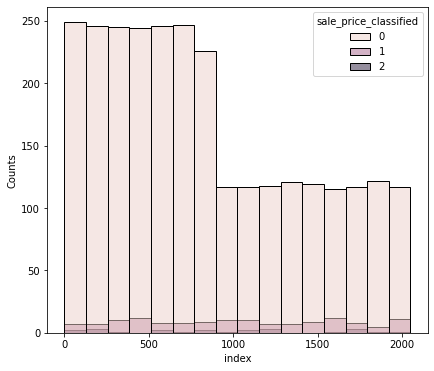

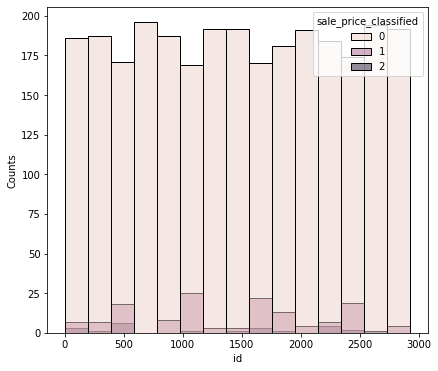

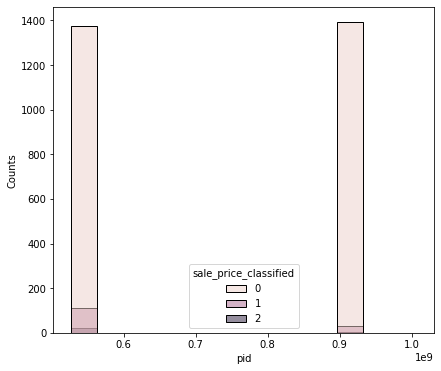

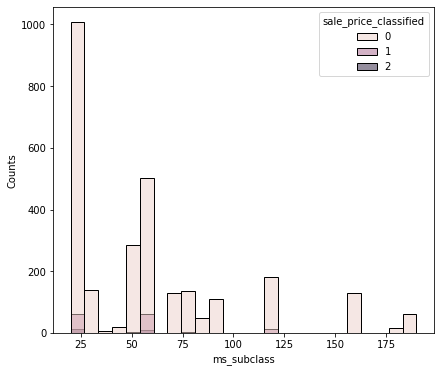

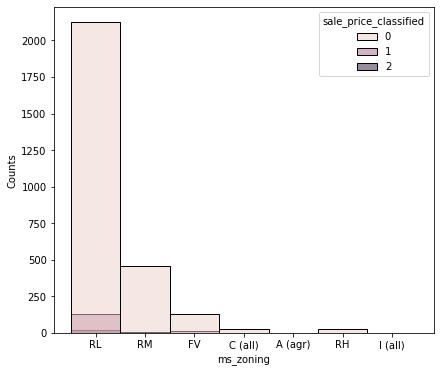

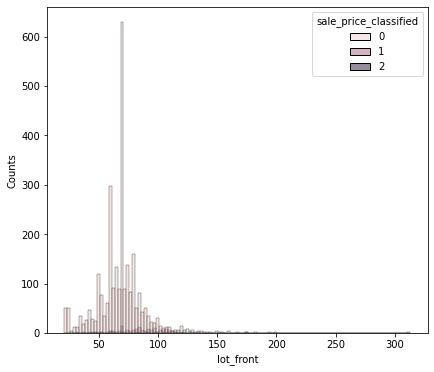

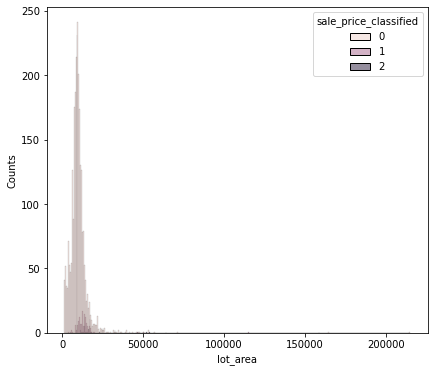

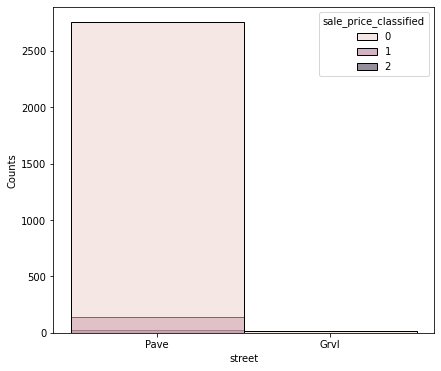

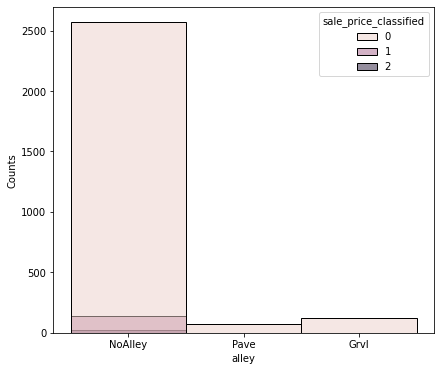

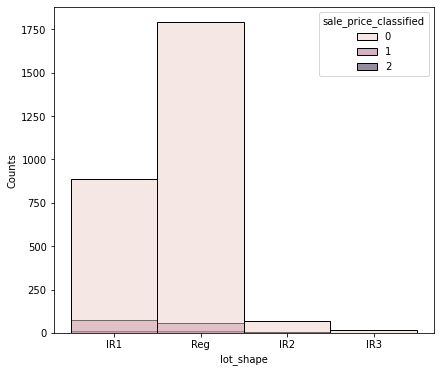

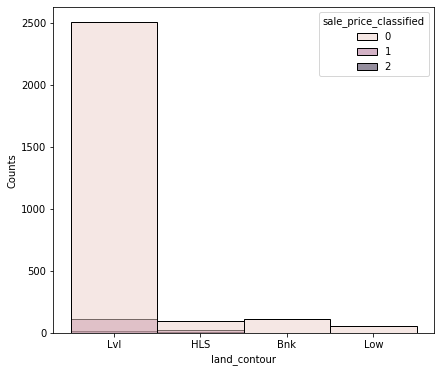

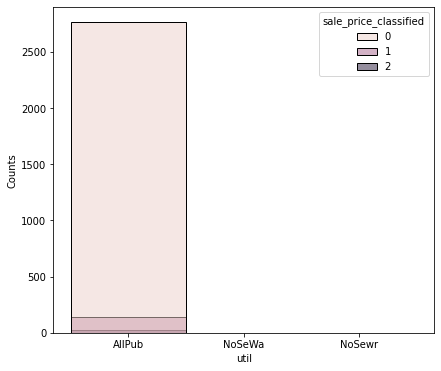

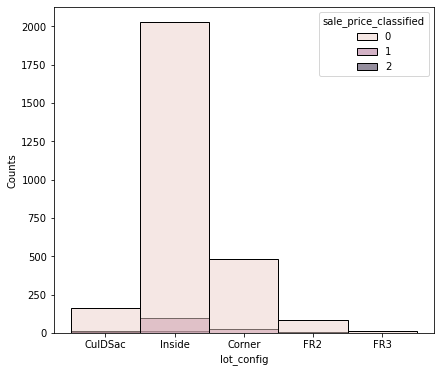

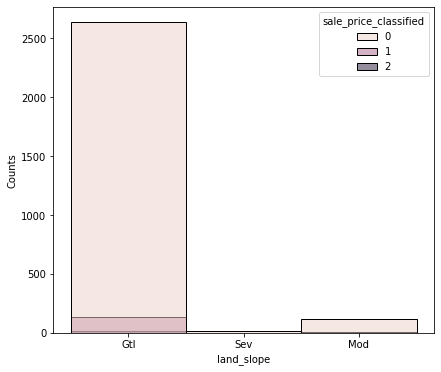

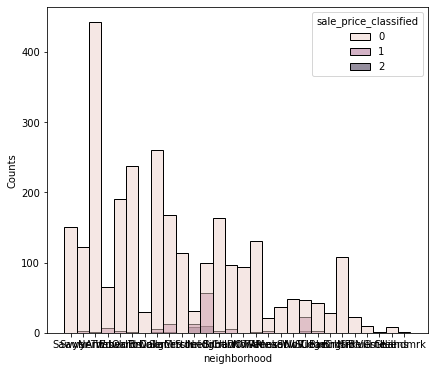

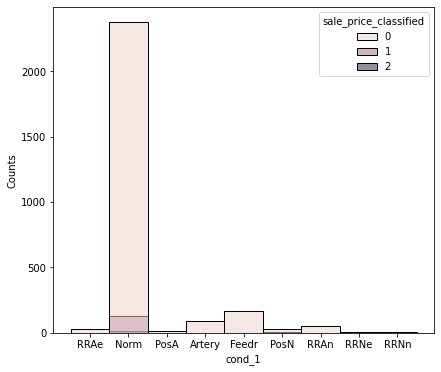

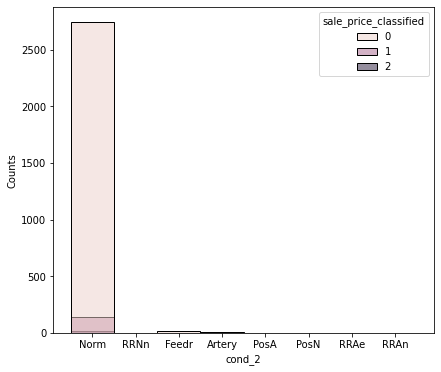

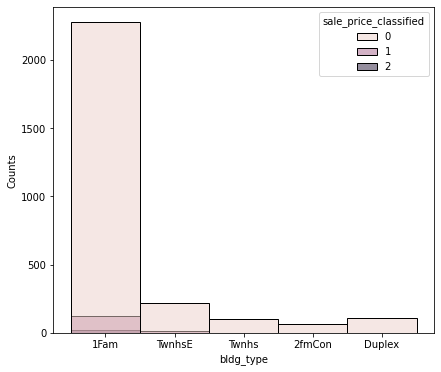

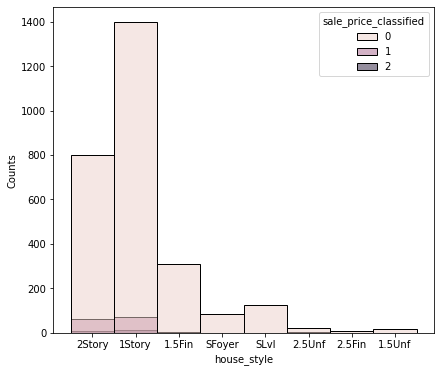

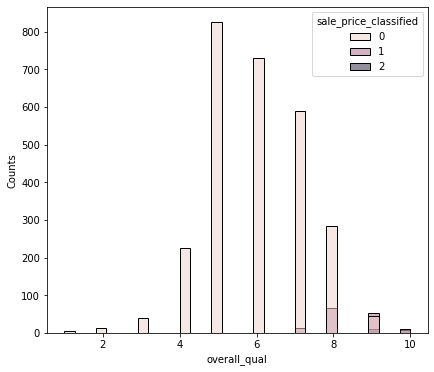

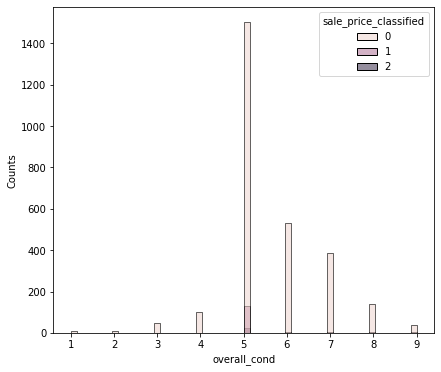

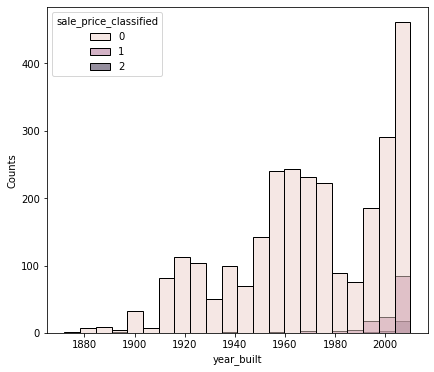

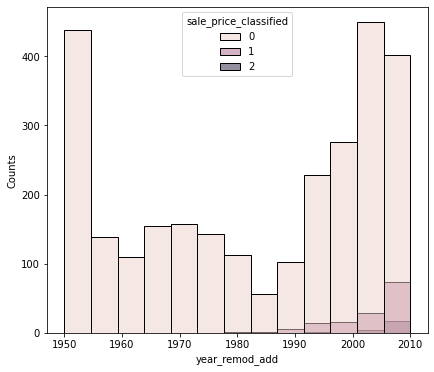

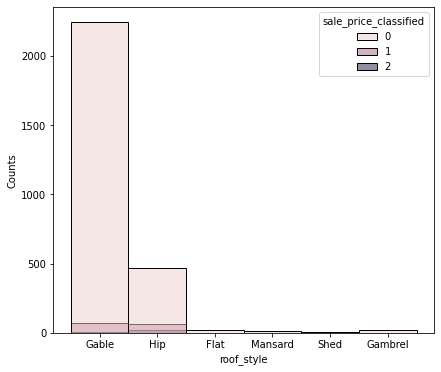

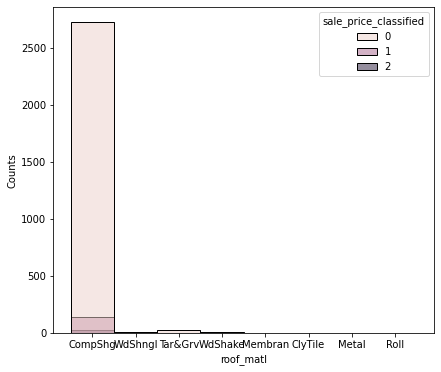

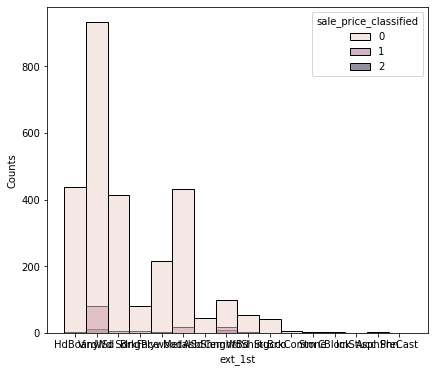

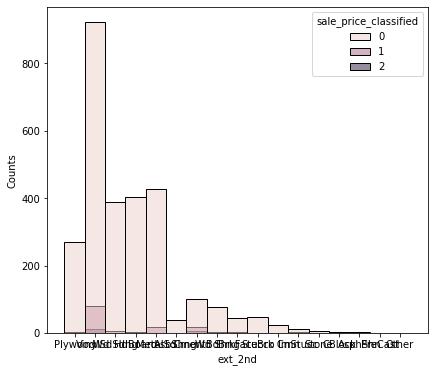

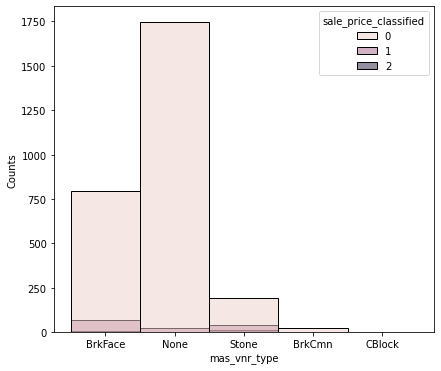

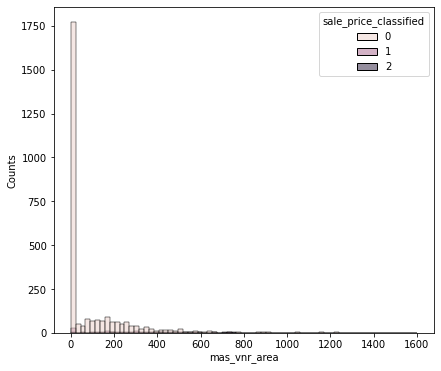

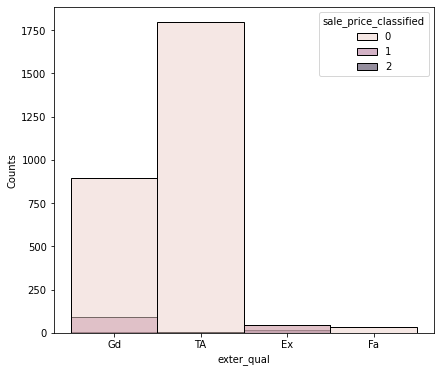

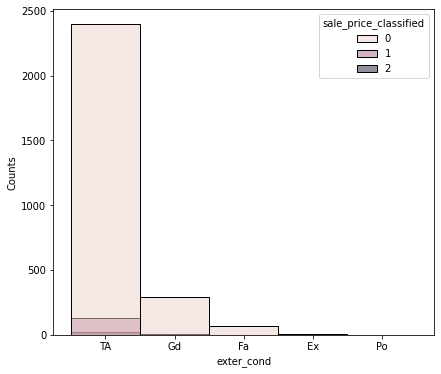

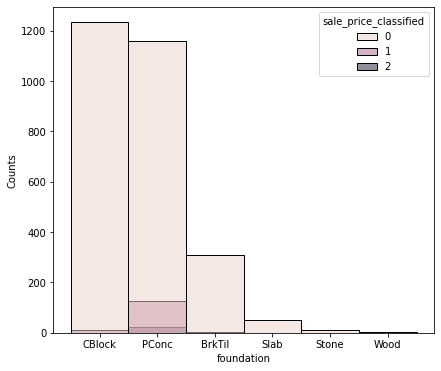

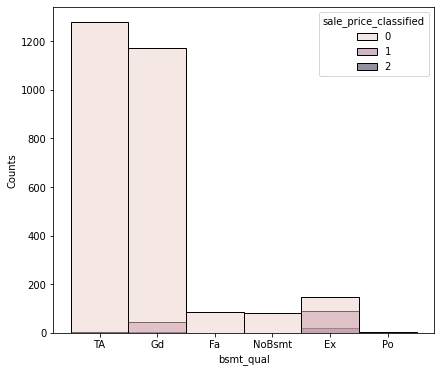

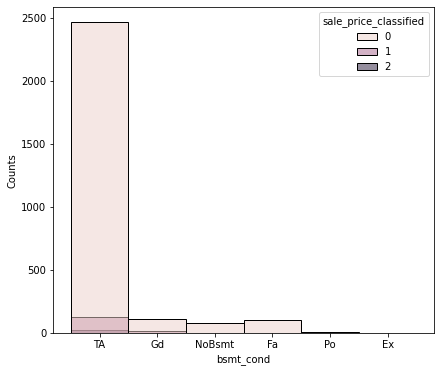

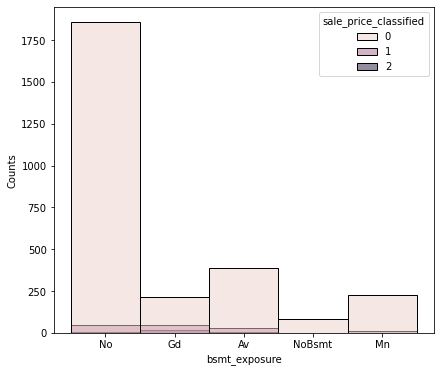

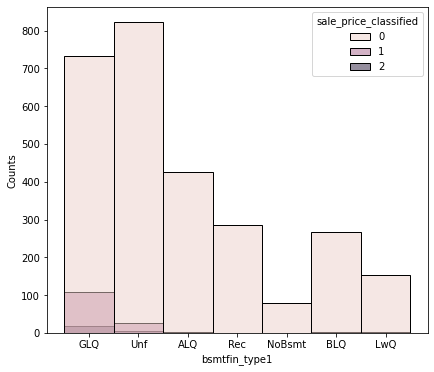

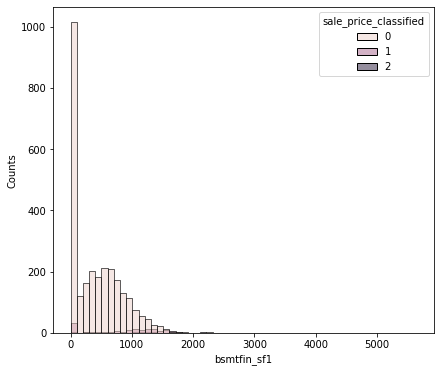

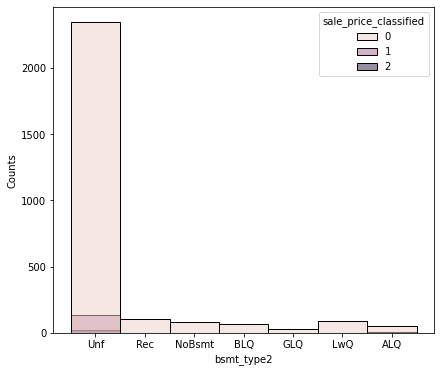

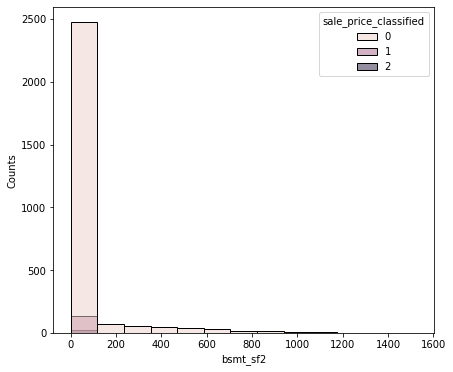

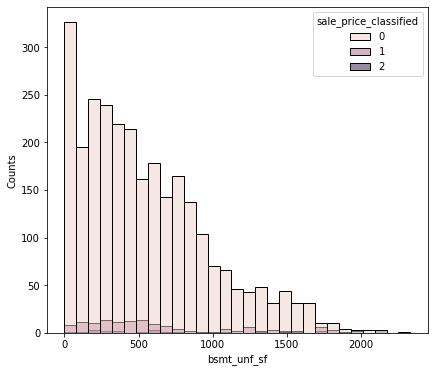

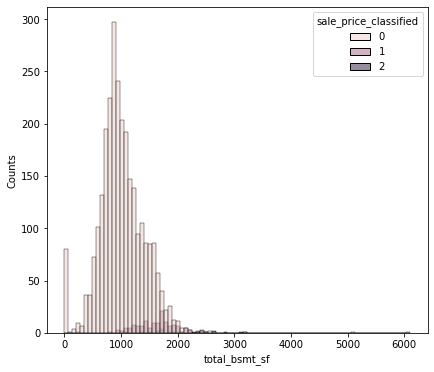

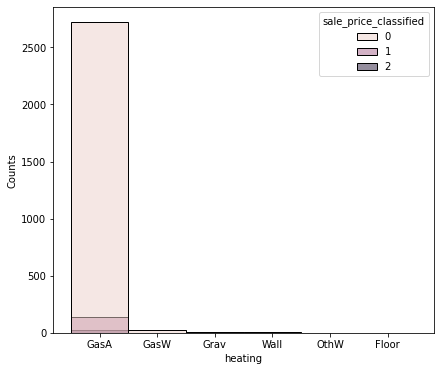

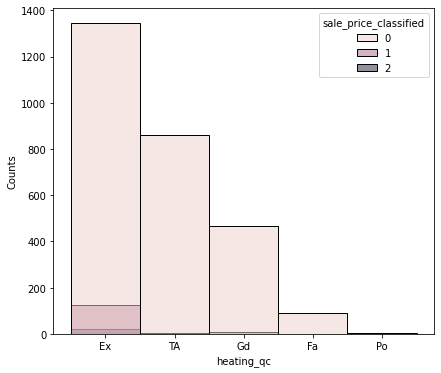

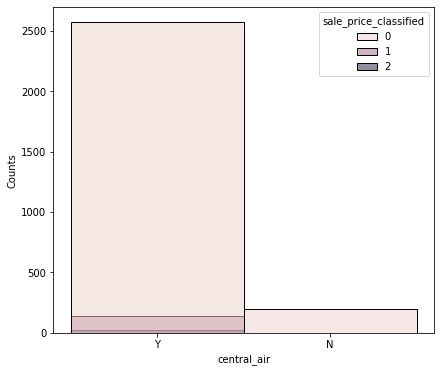

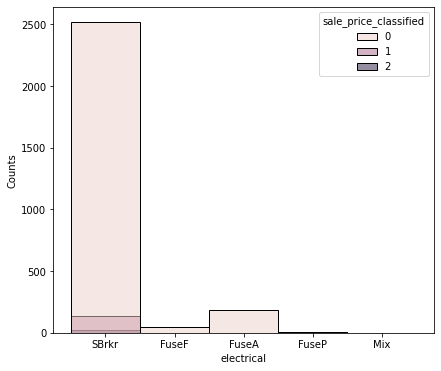

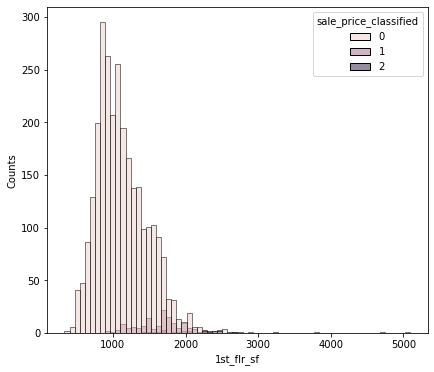

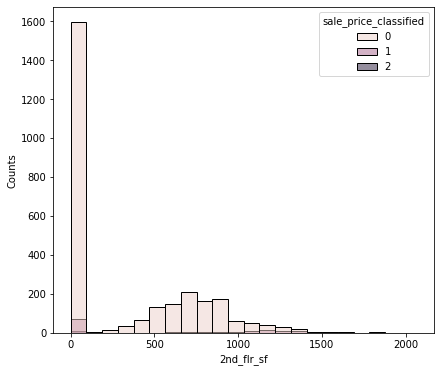

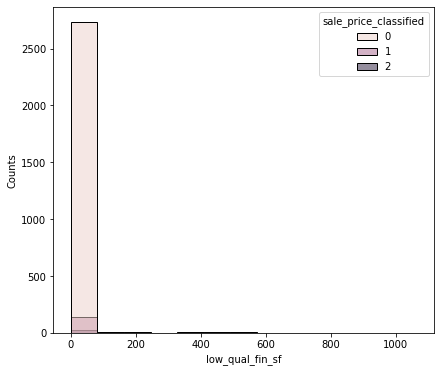

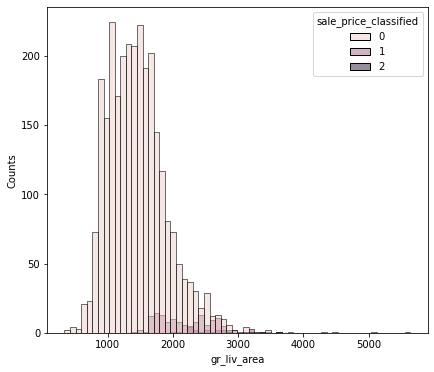

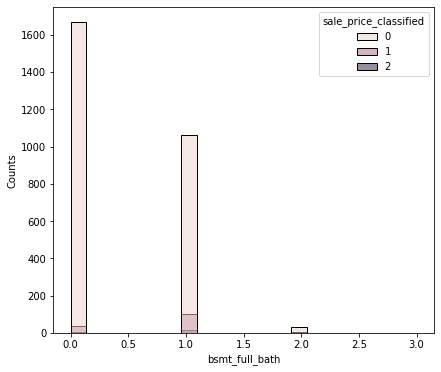

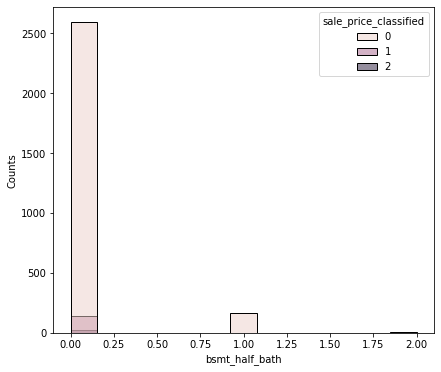

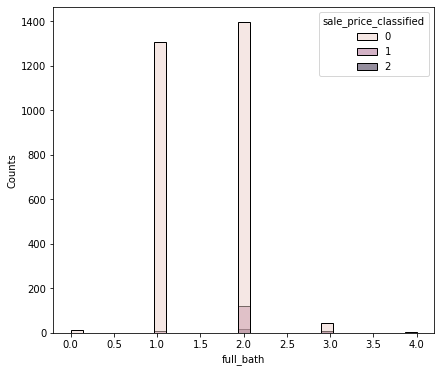

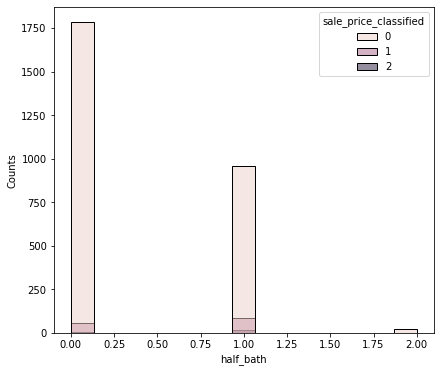

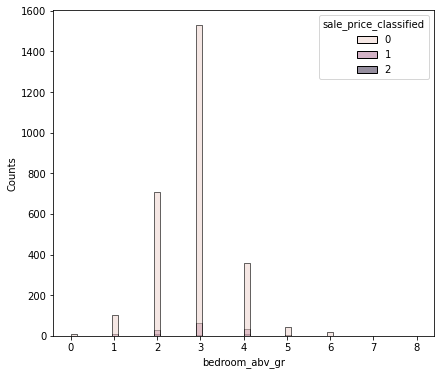

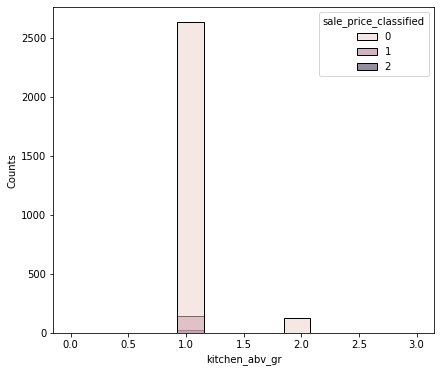

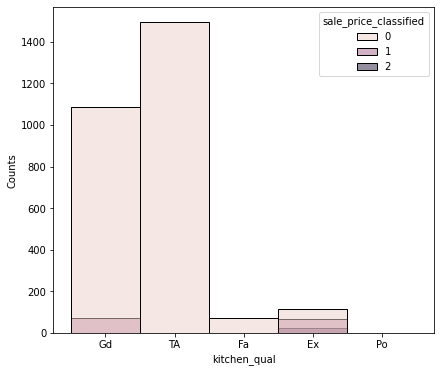

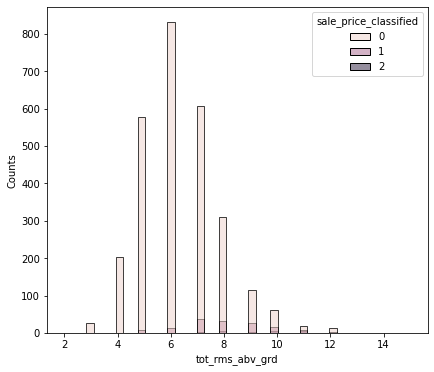

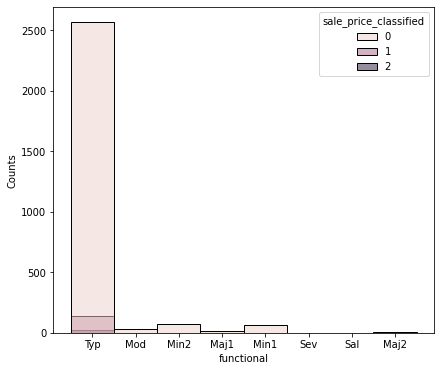

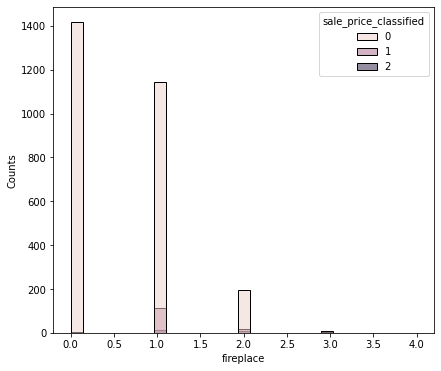

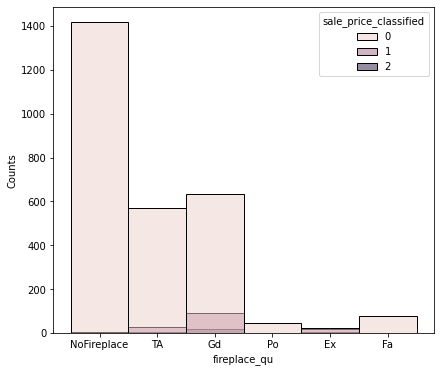

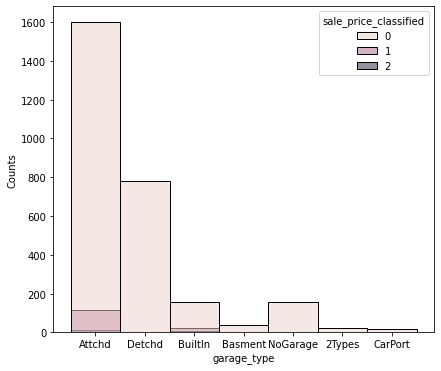

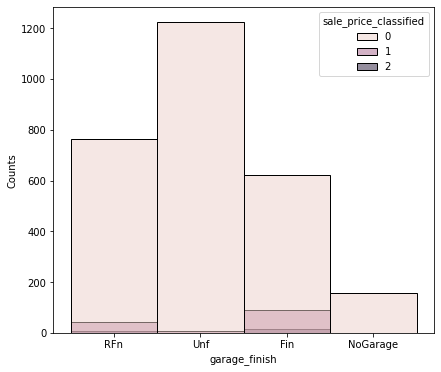

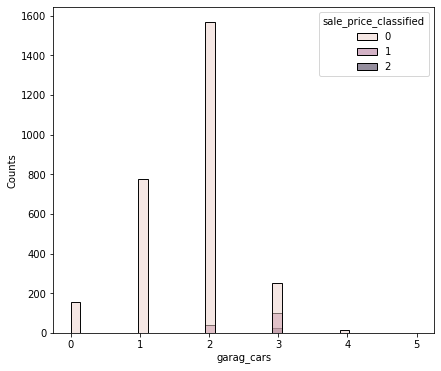

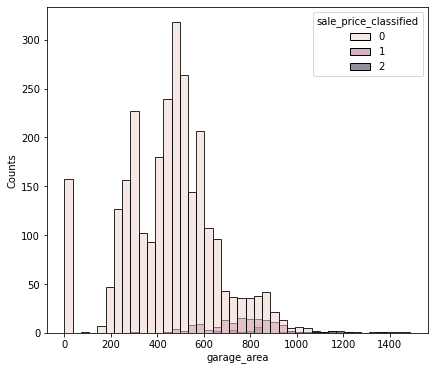

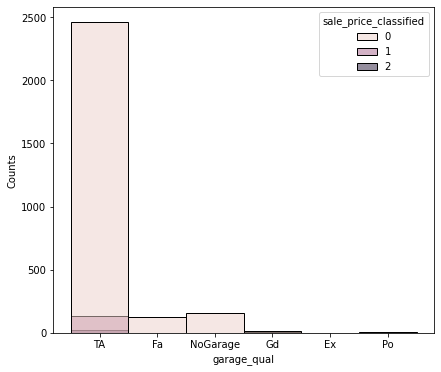

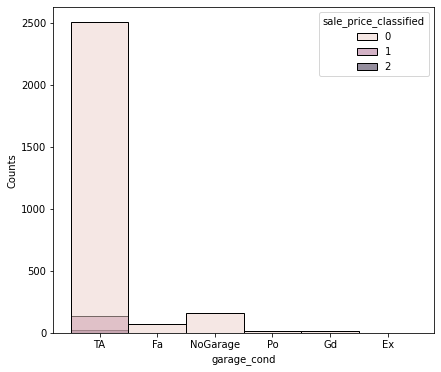

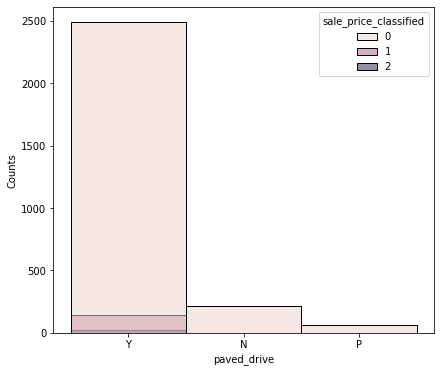

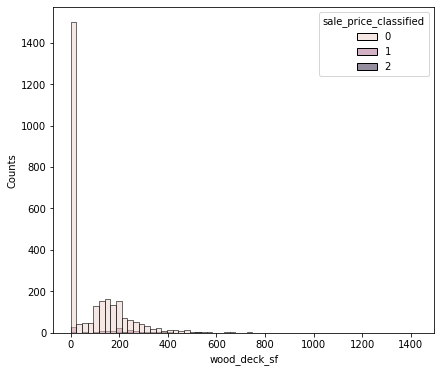

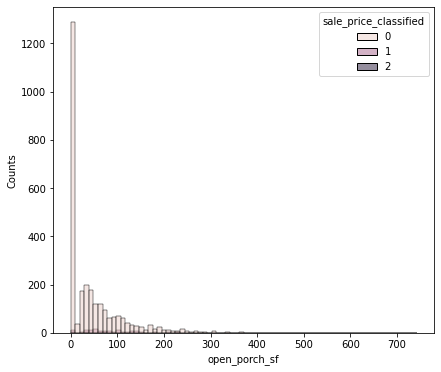

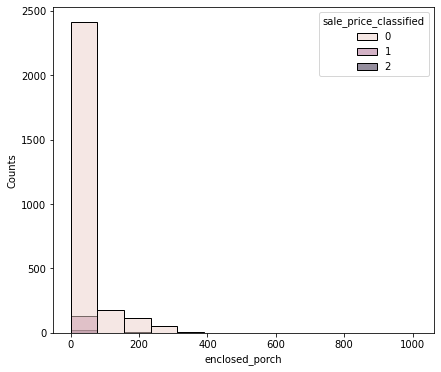

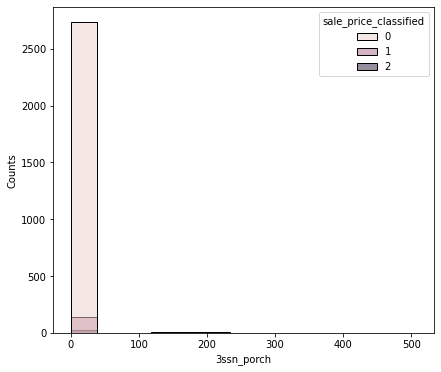

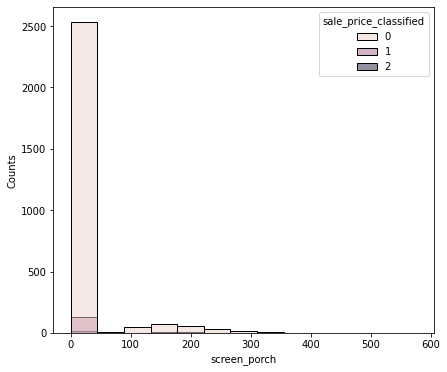

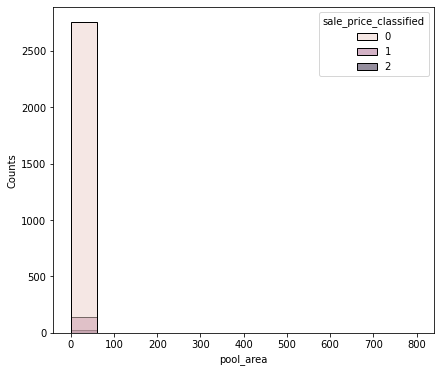

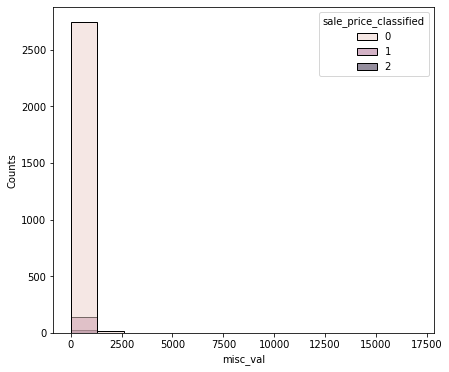

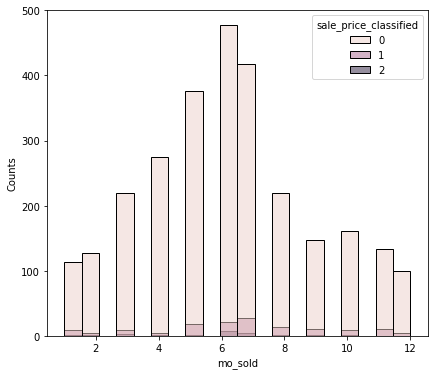

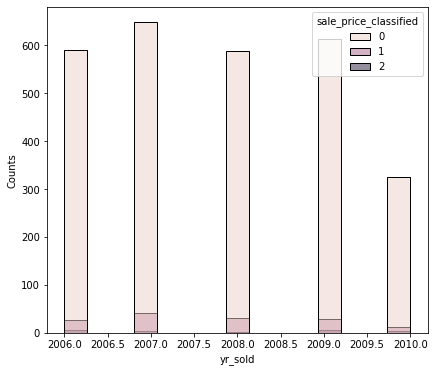

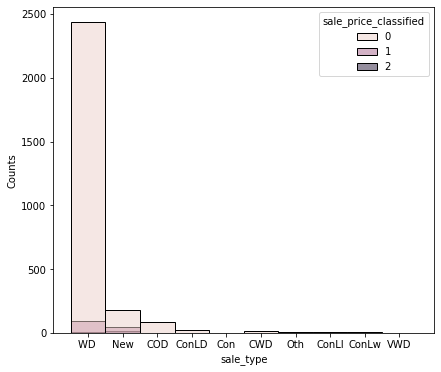

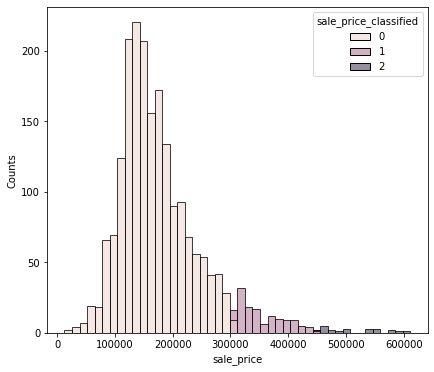

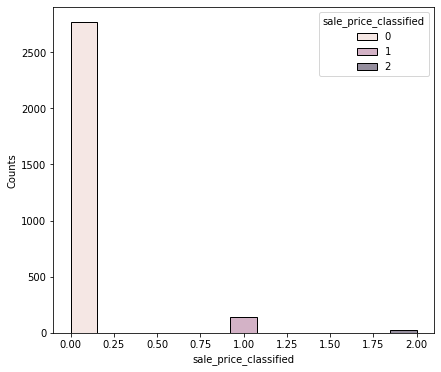

In [115]:
for var in df.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.histplot(x = var, data = df, hue = 'sale_price_classified', color = 'tab10')
    fig.set_title('')
    fig.set_xlabel(var)
    fig.set_ylabel('Counts')

    plt.show()

**Variables not to use/may not use**

id, pid --> no relevance 

ms_subclass, ms_zoning, cond1, cond2, bldg_type,house_style, overall_cond, ext_1st, ext_2nd, mas_vnr_type,mas_vnr_area
bsmt_cond, bsmt_exposure, bsmt_unf_sf, 2nd_Flor_sf, low_qual_fin_sf, bsmt_full_bath,  bsmt_half_bath, full_bath, half_bath, 
bedroom_abv_grd, kitchen_abv_grd , open_porch_sf, wood_deck_sf, 

--> overlaps with higher sale price, nt in order, hence not good 

pave, no alley, lot shape, land_cotour,util, lot_config, land_slope,roof_style, roof_matl,exter_cond,foundation, 
bsmtfin_type1, bsmt_type2, bsmt_sf2, heating, central_air, electrical, paved_drive, 
->> majority classified under low sale price, which may skew predicted price lower 

bsmtfin_sf1 --> good distribution against sale price clsuter, but having cluster even at near zero with high sale price
year_sold --> not much 


**Variables to use**

<!-- 1) lot_front -> distribution is clear against sale price

2) lot_area -> distribution is clear against sale price, but need to take care of above 20000 -->

3) Neighbourhood --> can see clusters of higher cost housing in certain areas

4) Overall_qual --> positively correlated to ordinal cat against sale price

5) year_built --> the latest it was built in, the higher the price, need to watch for cluster after year 2000

6) year_removd_add --> the latest it was built in, the higher the price, need to watch for cluster after year 2000

7) exter_qual --> positively correlated to ordinal cat against sale price, cluster in EX

8) bsmt_qual --> positively correlated to ordinal cat against sale price, cluster in EX

9) heating_qc --> most high end sale price are in ex, need watch for cluster at ex with normal sale price. 
              --> can consider interaction terms with other quals to be more accurate for higher selling price
              
              
10) total_bsmt_sf --> distribution is clear against sale price, need to create categorical separate by 3 sale groups for interactions 

11) 1st_flor_sf -->  distribution is clear against sale price, need to create categorical separate by 3 sale groups for interactions 

12) gv_liv_area-->  distribution is clear against sale price, need to create categorical separate by 3 sale groups for interactions 

13) kitchen_qual -->  distribution is clear against sale price, need to create categorical separate by 3 sale groups for interactions 

14) garage_finish --> ordinal cat matches with sales prices. 

15) fireplace_qu -> ordinal cat matches with sales prices.

(1000.0, 3000.0)

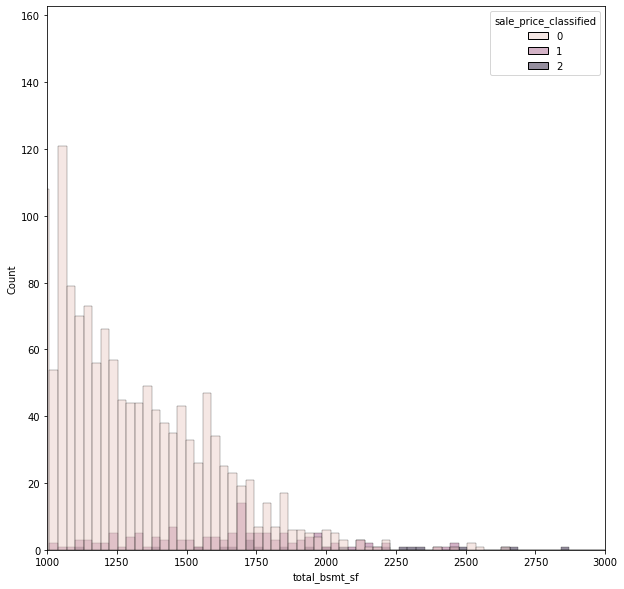

In [118]:
plt.figure(figsize=(10,10))
sns.histplot(x = 'total_bsmt_sf', data = df, hue = 'sale_price_classified', bins =200)

plt.xlim(1000,3000)

In [119]:
df.groupby('sale_price_classified')['total_bsmt_sf'].mean()

sale_price_classified
0    1013.212220
1    1622.128571
2    2060.782609
Name: total_bsmt_sf, dtype: float64

In [120]:
df['total_bsmt_sf_class'] = df['total_bsmt_sf'].map(lambda x: 1 if x > 1700 else 0)

<AxesSubplot:xlabel='neighborhood', ylabel='Count'>

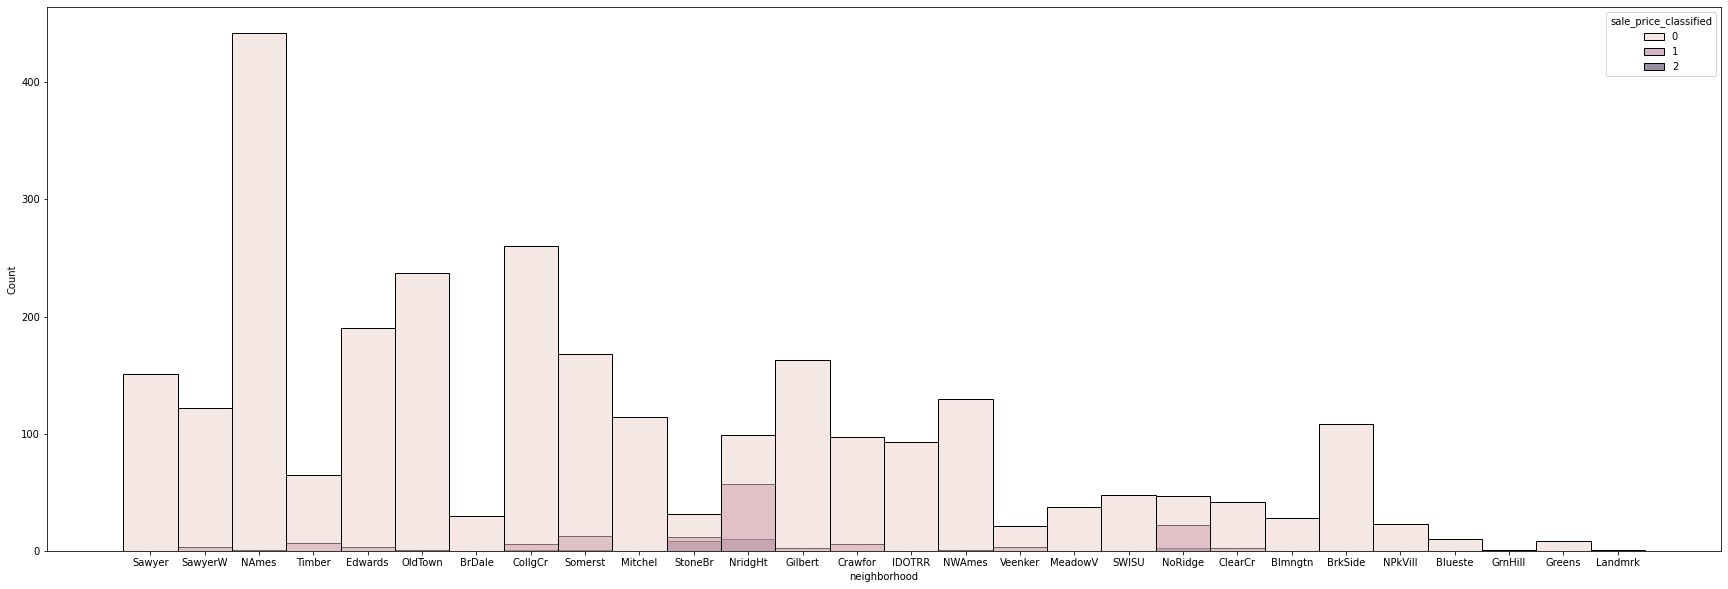

In [121]:
plt.figure(figsize=(30,10))
sns.histplot(x = 'neighborhood', data = df, hue = 'sale_price_classified')

# plt.xlim(1000,3000)

In [122]:
df['neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [123]:
# make new column to exclude the rest of neighbourhood as 0 and Northridge Heights, Stone Brook and Northridge having 1 

df['neighborhood_class'] = df['neighborhood'].map(lambda x: 1 if x in ['StoneBr', 'NridgHt', 'NoRidge'] else 0)

**comments**
1) Northridge Heights, Stone Brook and Northridge has majority high sale price housing


(1000.0, 3000.0)

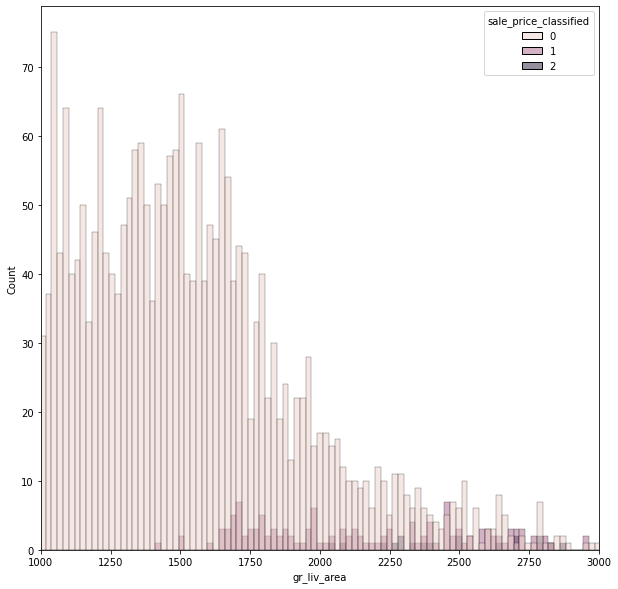

In [519]:
plt.figure(figsize=(10,10))
sns.histplot(x = 'gr_liv_area', data = df, hue = 'sale_price_classified', bins =200)

plt.xlim(1000,3000)

In [520]:
df['gr_liv_area_class'] = df['gr_liv_area'].map(lambda x: 1 if x > 2600 else 0)

### Filter out numerical, and categorical (Ordinal) features 

In [124]:
categorical_features = [col for col in df.columns if df[col].dtype == 'O']

In [125]:
numerical_features = [col for col in df.columns if df[col].dtype != 'O']

In [126]:
ordinal_cat = ['lot_shape','util','land_slope','exter_qual','exter_cond','bsmt_qual','bsmt_cond','bsmt_exposure',
               'bsmtfin_type1','bsmt_type2','electrical','kitchen_qual','functional','fireplace_qu','garage_finish',
               'garage_qual','garage_cond','paved_drive','overall_cond','heating_qc'
]

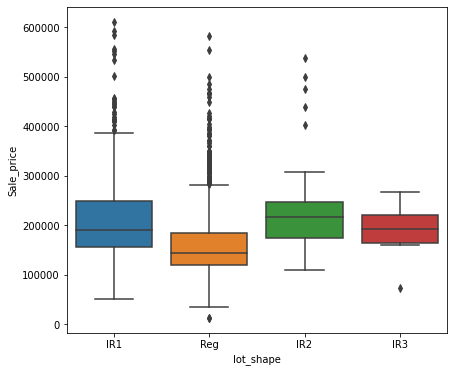

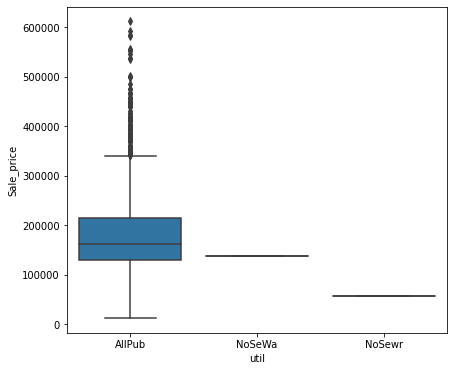

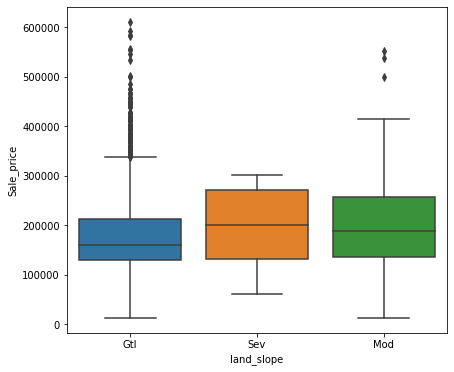

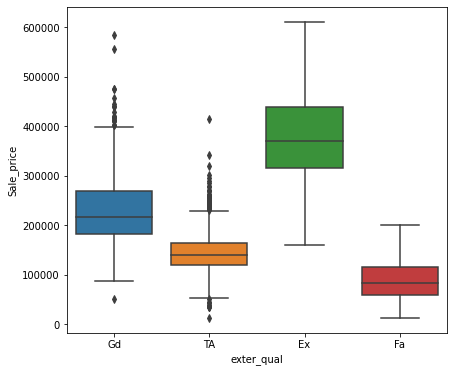

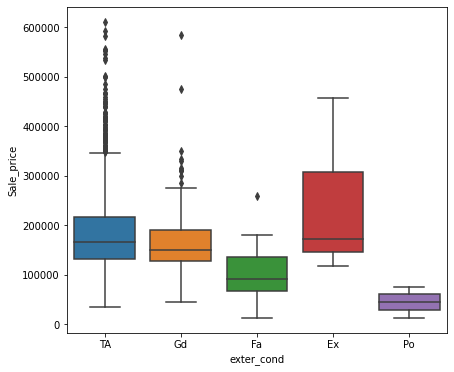

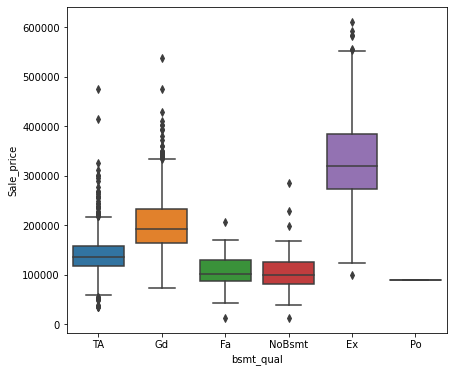

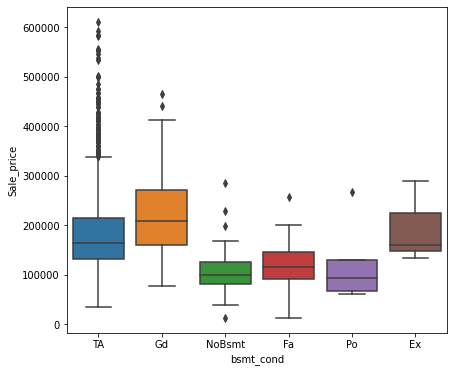

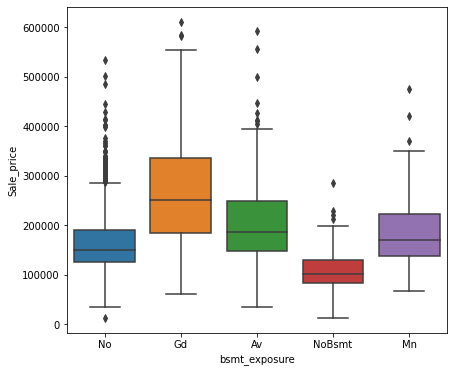

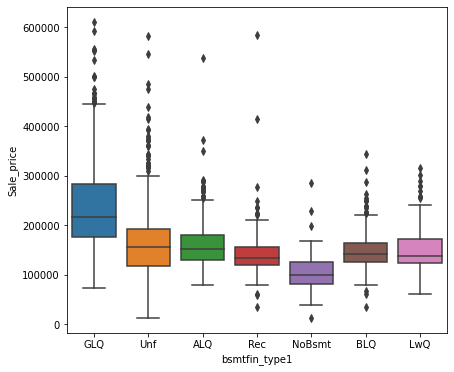

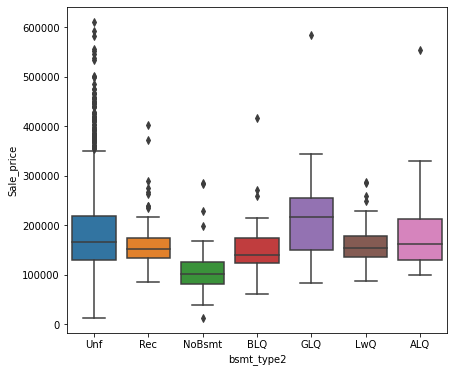

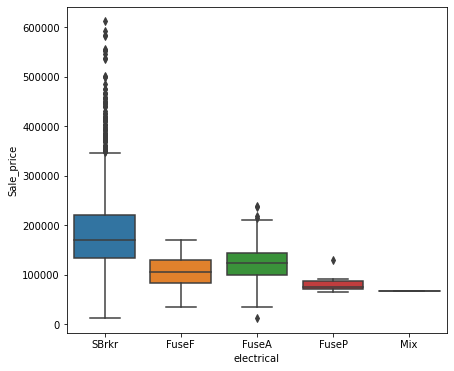

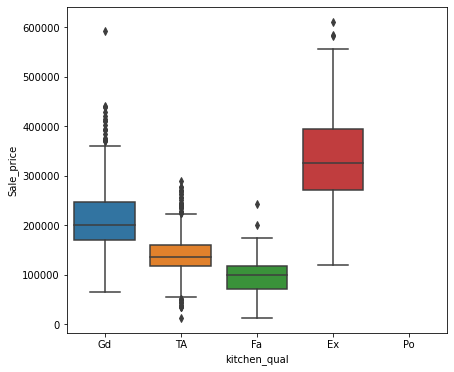

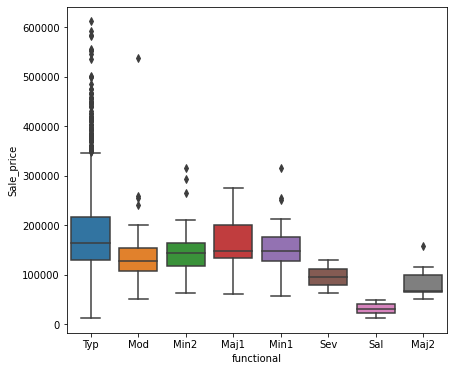

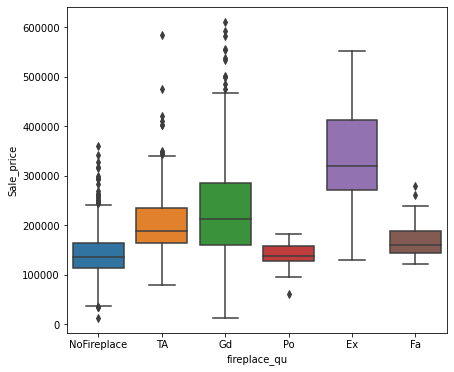

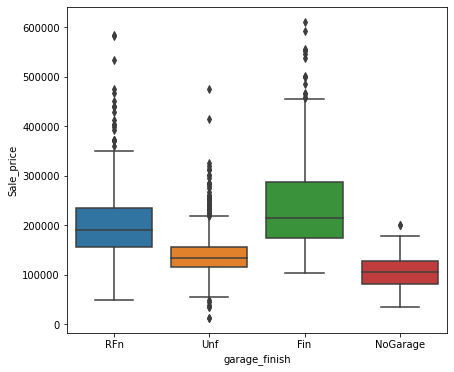

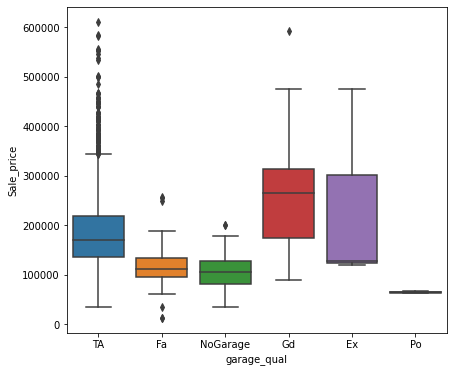

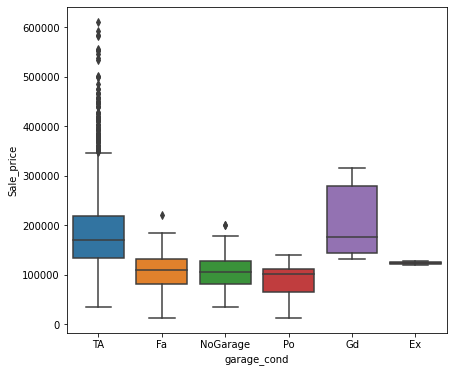

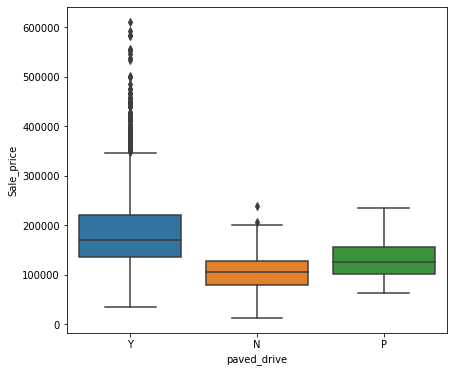

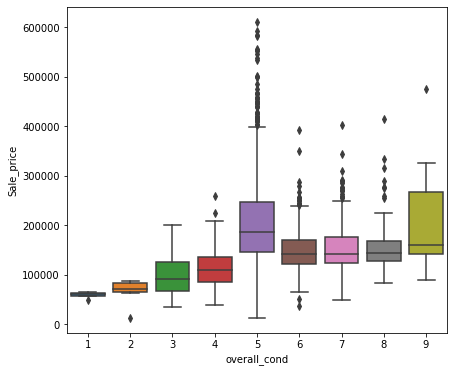

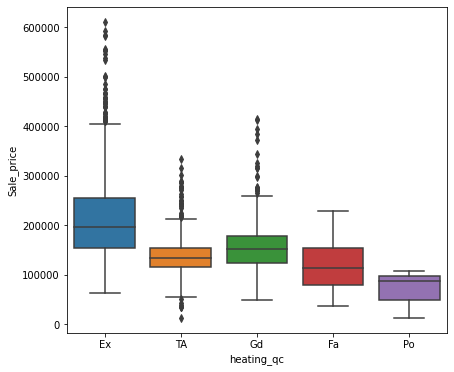

In [127]:
for var in ordinal_cat:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(x = var, y = 'sale_price', data = df)
    fig.set_title('')
    fig.set_xlabel(var)
    fig.set_ylabel('Sale_price')

    plt.show()

In [128]:
# assign 0 to bsmt_full_bath since no basement 
df.loc[df['bsmt_full_bath'].isnull(), 'bsmt_full_bath'] = 0
# assign 0 to bsmt_half_bath since no basement 
df.loc[df['bsmt_half_bath'].isnull(), 'bsmt_half_bath'] = 0

In [129]:
# assign to the most common types for electrical
df.loc[df['electrical'].isnull(), 'electrical'] = df['electrical'].mode()[0]

In [130]:
df.columns

Index(['index', 'id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_front',
       'lot_area', 'street', 'alley', 'lot_shape', 'land_contour', 'util',
       'lot_config', 'land_slope', 'neighborhood', 'cond_1', 'cond_2',
       'bldg_type', 'house_style', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod_add', 'roof_style', 'roof_matl', 'ext_1st',
       'ext_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual', 'exter_cond',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type1', 'bsmtfin_sf1', 'bsmt_type2', 'bsmt_sf2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', 'electrical',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abv_gr', 'kitchen_abv_gr', 'kitchen_qual', 'tot_rms_abv_grd',
       'functional', 'fireplace', 'fireplace_qu', 'garage_type',
       'garage_finish', 'garag_cars', 'garage_area', 'garag

*choosing relevant variables for main set of data*

<AxesSubplot:xlabel='gr_liv_area', ylabel='sale_price'>

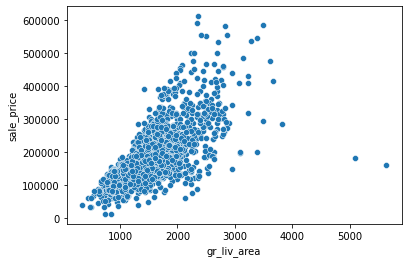

In [131]:
# remove outlier 

sns.scatterplot(
    x = 'gr_liv_area',
    y = 'sale_price',
    data = df
)

In [363]:
# remove outlier 

df = df[df['gr_liv_area'] < 5000]

In [633]:
area_only = ['lot_front', 'lot_area','total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'sale_price']

main_variables = ['lot_front', 'lot_area', 'overall_qual', 'year_built', 'year_remod_add',
 'exter_qual', 'bsmt_qual', 'heating_qc', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area',
 'kitchen_qual', 'garage_finish', 'fireplace_qu', 'total_bsmt_sf_class', 'neighborhood_class', 'gr_liv_area_class', 'sale_price']

In [634]:
# main data to do faeture engineering 
main_data = df.copy()

In [635]:
main_data = main_data[area_only]

In [636]:
main_data

lot_front  lot_area  total_bsmt_sf  1st_flr_sf  gr_liv_area  sale_price
0     69.199672     13517          725.0         725         1479    130500.0
1     43.000000     11492          913.0         913         2122    220000.0
2     68.000000      7922         1057.0        1057         1057    109000.0
3     73.000000      9802          384.0         744         1444    174000.0
4     82.000000     14235          676.0         831         1445    138500.0
...         ...       ...            ...         ...          ...         ...
2924  80.000000      8000         1084.0        1084         1877         NaN
2925  90.000000     14670         1104.0        1104         1988         NaN
2926  55.000000      8250          952.0        1211         1211         NaN
2927  60.000000      9000          864.0         864          864         NaN
2928  70.000000      8400          923.0         925          925         NaN

[2927 rows x 6 columns]

In [549]:
# defining a function to return rate
def rate_Po_Excellent(col):
    rate_dict = {'NoBsmt': 0,'NoFireplace': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
    
    return rate_dict[col]

In [550]:
main_data['fireplace_qu'].unique()

array(['NoFireplace', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [551]:
main_data['kitchen_qual'].unique()

array(['Gd', 'TA', 'Fa', 'Ex', 'Po'], dtype=object)

In [552]:
main_data['heating_qc'].unique()

array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [553]:
main_data['bsmt_qual'].unique()

array(['TA', 'Gd', 'Fa', 'NoBsmt', 'Ex', 'Po'], dtype=object)

In [554]:
# assign ordinal score to these columns 

main_data['exter_qual'] = main_data['exter_qual'].map(rate_Po_Excellent)
main_data['bsmt_qual'] = main_data['bsmt_qual'].map(rate_Po_Excellent)
main_data['kitchen_qual'] = main_data['kitchen_qual'].map(rate_Po_Excellent)
main_data['heating_qc'] = main_data['heating_qc'].map(rate_Po_Excellent)
main_data['fireplace_qu'] = main_data['fireplace_qu'].map(rate_Po_Excellent)

In [555]:
# create dict for garage finish  
garage_fin_dict = {'NoGarage':0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

In [556]:
main_data['garage_finish'] = main_data['garage_finish'].map(garage_fin_dict)

In [595]:
main_variables

['lot_front',
 'lot_area',
 'overall_qual',
 'year_built',
 'year_remod_add',
 'exter_qual',
 'bsmt_qual',
 'heating_qc',
 'total_bsmt_sf',
 '1st_flr_sf',
 'gr_liv_area',
 'kitchen_qual',
 'garage_finish',
 'fireplace_qu',
 'total_bsmt_sf_class',
 'neighborhood_class',
 'gr_liv_area_class',
 'sale_price']

In [ ]:
area_only = ['lot_front', 'lot_area','total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'sale_price']

In [602]:
# creating interaction terms 

main_data['interaction_1'] = main_data['year_built'] * main_data['gr_liv_area']**0.5 * main_data['exter_qual'] * main_data['bsmt_qual'] \
* main_data['kitchen_qual'] * main_data['garage_finish'] * main_data['1st_flr_sf']**0.5 * main_data['lot_area']**0.5 \
* main_data['fireplace_qu'] * main_data['total_bsmt_sf']**0.5

<AxesSubplot:xlabel='interaction_1', ylabel='sale_price'>

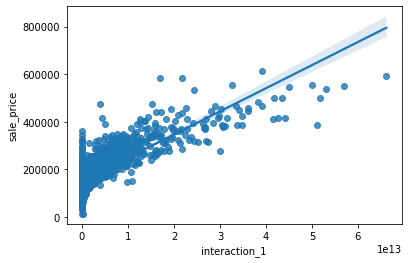

In [603]:
sns.regplot(
    x = 'interaction_1',
    y = 'sale_price',
    data = main_data

)

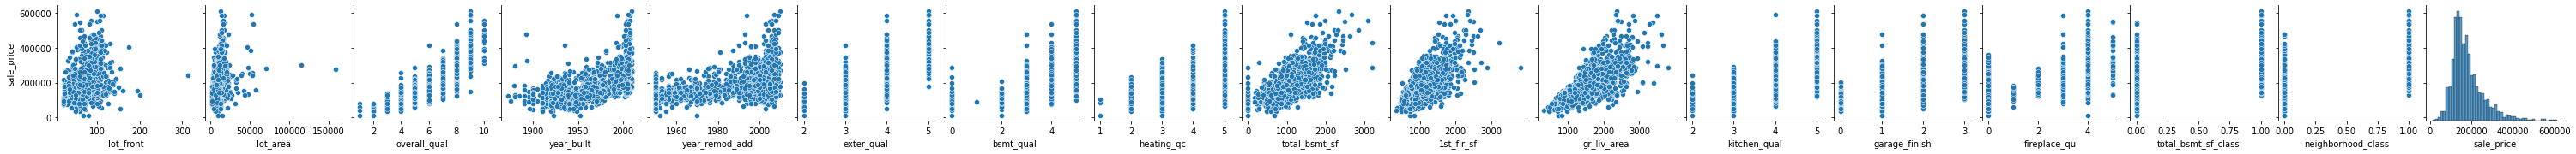

In [509]:
sns.pairplot(
    x_vars = main_variables,
    y_vars = 'sale_price',
    data = main_data

)

In [637]:
# split test data (Kaggle)

kaggle_test_final = main_data[main_data.loc[:,'sale_price'].isnull()]

In [638]:
# split train data (Kaggle)

kaggle_train_final = main_data[:2049]

In [639]:
kaggle_train_final.isnull().sum()

lot_front        0
lot_area         0
total_bsmt_sf    0
1st_flr_sf       0
gr_liv_area      0
sale_price       0
dtype: int64

## Pre - processing

**Apply Standard Scaler**

In [640]:
kaggle_train_final.columns

Index(['lot_front', 'lot_area', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area',
       'sale_price'],
      dtype='object')

In [641]:
# assign X and y

X = kaggle_train_final.drop(columns = ['sale_price'])
y = kaggle_train_final['sale_price']


# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state = 123
)

# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
# Z_train = sc.fit_transform(X_train)
sc.fit(X_train) # fit should only see train data, 
                #else if put in test, will have leak from the train data 
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Modelling

**Linear Regression - First pass**

In [642]:
lr = LinearRegression()

lr.fit(X_train,y_train)

# cross val mse
cross_score = - cross_val_score(
    lr,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

# test mse
mse_test = mean_squared_error(
    y_test,
    lr.predict(X_test)
)
# cross - test 
mse_train_minus_test = cross_score - mse_test

if mse_train_minus_test > 0:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Underfited by: {mse_train_minus_test}')
else:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Overfitted by: {mse_train_minus_test}')
print(f'RMSE: {mse_test**0.5}')

MSE for train: 2082420251.4422932
MSE for test: 1847875651.7054195
Underfited by: 234544599.73687363
RMSE: 42986.92419452012


In [ ]:
MSE for train: 705189115.4970307
MSE for test: 588323843.5450833
Underfited by: 116865271.95194745
RMSE: 24255.387928150794

Text(27.125, 0.5, 'Actual Sale Price')

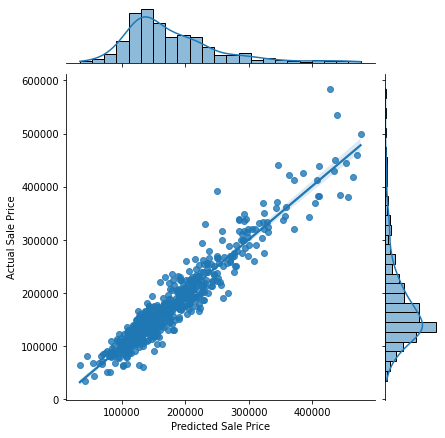

In [609]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax = sns.jointplot(
    x = lr.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax.ax_joint.set_xlabel('Predicted Sale Price')
ax.ax_joint.set_ylabel('Actual Sale Price')

**Lasso Regression**

In [610]:
# initiate 
lasso = LassoCV(
    cv=5,
    max_iter=50000,
    n_alphas=200,
)

# Fit model using best ridge alpha!
lasso.fit(X_train, y_train);


lasso.alpha_

245.9646622673085

In [611]:
lasso_best = Lasso(alpha = lasso.alpha_)

In [612]:
# fit lasso best 

lasso_best.fit(X_train,y_train)

Lasso(alpha=245.9646622673085)

In [613]:
# cross val mse
cross_score = - cross_val_score(
    lasso_best,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

# test mse
mse_test = mean_squared_error(
    y_test,
    lasso_best.predict(X_test)
)
# cross - test 
mse_train_minus_test = cross_score - mse_test

if mse_train_minus_test > 0:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Underfited by: {mse_train_minus_test}')
else:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Overfitted by: {mse_train_minus_test}')
print(f'RMSE: {mse_test**0.5}')

MSE for train: 699717741.9201751
MSE for test: 586056277.4042552
Underfited by: 113661464.51591992
RMSE: 24208.599244984314


Text(27.125, 0.5, 'Actual Sale Price')

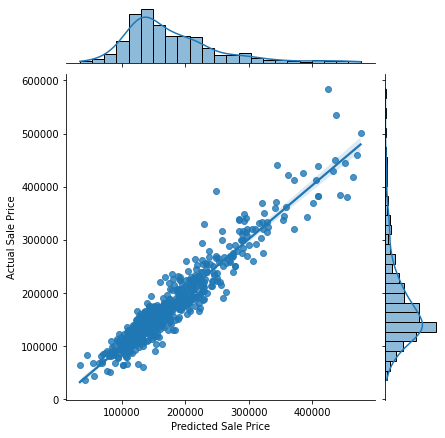

In [614]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax = sns.jointplot(
    x = lasso_best.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax.ax_joint.set_xlabel('Predicted Sale Price')
ax.ax_joint.set_ylabel('Actual Sale Price')

In [615]:
lasso_best.predict(X_test).max()

476192.1757874504

In [628]:
kaggle_train_final.columns

Index(['lot_front', 'lot_area', 'overall_qual', 'year_built', 'year_remod_add',
       'exter_qual', 'bsmt_qual', 'heating_qc', 'total_bsmt_sf', '1st_flr_sf',
       'gr_liv_area', 'kitchen_qual', 'garage_finish', 'fireplace_qu',
       'total_bsmt_sf_class', 'neighborhood_class', 'gr_liv_area_class',
       'sale_price', 'interaction_1'],
      dtype='object')

<AxesSubplot:>

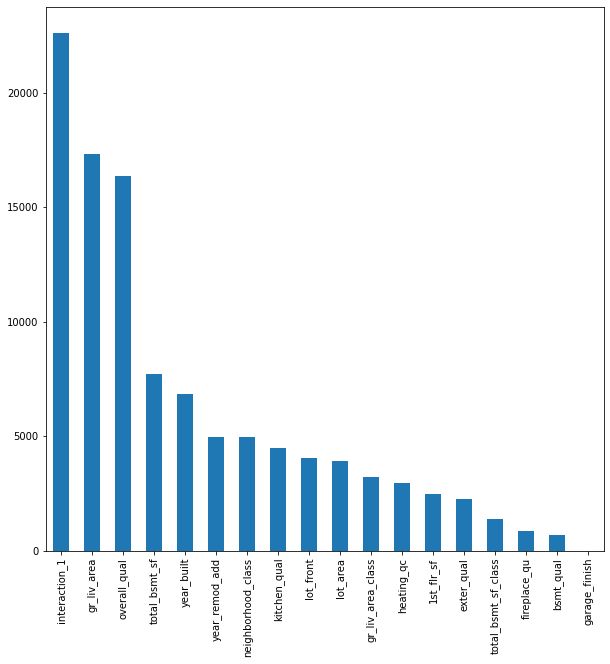

In [631]:
# hwo to plot the series 
plt.figure(figsize=(10,10))

col = kaggle_train_final.columns.drop('sale_price')
pd.Series(lasso_best.coef_, index = col).sort_values(ascending = False).plot.bar()

In [616]:
# find out index 339 having anomaly 
anomaly = {num: val for num,val in enumerate (lasso_best.predict(X_test)>638000) if val == True}
anomaly

{}

In [617]:
y_test.values[339]

156000.0

In [618]:
# find out other similar prices with 160000
{num: val for num,val in enumerate (y_test == y_test.values[339]) if val == True}

{312: True, 339: True}

In [619]:
Ab_val= pd.DataFrame(X_test[339])
val1= pd.DataFrame(X_test[31])
val2= pd.DataFrame(X_test[286])

In [620]:
Ab_val.shape

(18, 1)

In [621]:
val1.shape

(18, 1)

In [622]:
val2.shape

(18, 1)

In [623]:
sample = pd.concat([Ab_val,val1,val2], axis = 1)
sample.columns = ['Ab', 'norm1', 'norm2']

In [624]:
# True outlier compared to two other rows with similar coefficients against sale price

sample.sort_values(by = 'Ab', ascending = False)

Ab     norm1     norm2
0   0.474901 -0.435943 -0.435943
12  0.296517  0.296517  0.296517
8   0.033079 -0.450317  0.833342
1   0.008911 -0.412379 -0.291134
16 -0.175821 -0.175821 -0.175821
9  -0.252096 -0.804016  0.661610
3  -0.254680 -0.757032  1.151908
14 -0.270838 -0.270838 -0.270838
15 -0.337963 -0.337963  2.958902
17 -0.459645 -0.459645  0.275841
6  -0.535693 -0.535693  0.555477
5  -0.702595 -0.702595  0.990718
2  -0.789263 -0.789263  1.292533
11 -0.798466  0.718091  0.718091
10 -0.891992 -1.325429 -0.174437
4  -0.941759  0.826890  1.065896
13 -0.978555 -0.978555  1.236516
7  -1.215387 -0.174871  0.865646

In [625]:
=

SyntaxError: invalid syntax (Temp/ipykernel_17864/1763773627.py, line 1)

In [ ]:
kaggle_train_final.drop(index = 960, inplace = True)
kaggle_train_final.reset_index(inplace = True)

In [ ]:
# df.drop(index = 960, inplace = True)
# df.reset_index(inplace = True)

In [ ]:
# assign X and y

X = kaggle_train_final.drop(columns = 'sale_price')
y = kaggle_train_final['sale_price']


# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state = 123
)

# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
# Z_train = sc.fit_transform(X_train)
sc.fit(X_train) # fit should only see train data, 
                #else if put in test, will have leak from the train data 
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# initiate 

lasso = LassoCV(
    cv=5,
    max_iter=50000,
    n_alphas=200,
)
# Fit model using best ridge alpha!
lasso.fit(X_train, y_train)
lasso_best = Lasso(alpha = lasso.alpha_)


# fit lasso best with variables 
lasso_best.fit(X_train, y_train)

# cross val mse
cross_score = - cross_val_score(
    lasso_best,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

# test mse
mse_test = mean_squared_error(
    y_test,
    lasso_best.predict(X_test)
)
# cross - test 
mse_train_minus_test = cross_score - mse_test

if mse_train_minus_test > 0:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Underfited by: {mse_train_minus_test}')
else:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Overfitted by: {mse_train_minus_test}')
print(f'RMSE: {mse_test**0.5}')

In [ ]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax2 = sns.jointplot(
    x = lasso_best.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax2.ax_joint.set_xlabel('Predicted Sale Price - No log')
ax2.ax_joint.set_ylabel('Actual Sale Price')

In [ ]:
# hwo to plot the series 
plt.figure(figsize=(10,10))
pd.Series(lasso_best.coef_, index = df[varia.columns).sort_values(ascending = False).plot.bar()

In [ ]:
data.columns.drop(['sale_price', 'above300K_1'])

In [ ]:
# hwo to plot the series 
plt.figure(figsize=(10,10))
pd.Series(lasso_best.coef_, index = data.columns.drop(['sale_price', 'above300K_1'])).sort_values(ascending = False).plot.bar()

In [ ]:
grouped = df.groupby('neighborhood')['sale_price']

In [ ]:
feature_set_model = SelectFromModel(lasso_best)
feature_set_model.fit(X_train,y_train)

In [ ]:
len(X_train)

In [ ]:
len(y_train)

In [ ]:
feature_set_model.get_support()

In [ ]:
#refined model 
refined = X.columns[feature_set_model.get_support()]

In [ ]:
X = model_feat[refined]
y = model_feat['sale_price']

# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state = 123
)

# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
# Z_train = sc.fit_transform(X_train)
sc.fit(X_train) # fit should only see train data, 
                #else if put in test, will have leak from the train data 
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# fit 

lasso.fit(X_train,y_train)

lasso.alpha_

In [ ]:
# create lasso best 2 

lasso_best_2 = Lasso(alpha=lasso.alpha_)

In [ ]:
lasso_best_2.fit(X_train,y_train)

In [ ]:
# cross val mse
cross_score = - cross_val_score(
    lasso_best_2,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

# test mse
mse_test = mean_squared_error(
    y_test,
    lasso_best_2.predict(X_test)
)
# cross - test 
mse_train_minus_test = cross_score - mse_test

if mse_train_minus_test > 0:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Underfited by: {mse_train_minus_test}')
else:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Overfitted by: {mse_train_minus_test}')
print(f'RMSE: {mse_test**0.5}')

In [ ]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax2 = sns.jointplot(
    x = lasso_best_2.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax2.ax_joint.set_xlabel('Predicted Sale Price - No log')
ax2.ax_joint.set_ylabel('Actual Sale Price')

In [ ]:
X.columns

In [ ]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax2 = sns.jointplot(
    x = lasso_best_2.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax2.ax_joint.set_xlabel('Predicted Sale Price - No log')
ax2.ax_joint.set_ylabel('Actual Sale Price')